<div class="alert alert-block alert-info">

## Tasca M8 T01 Algoritmes Aprenenteatge NO supervisat: Agrupació - Clustering.


- **Exercici 1**

    - Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

    - Important

        - Tingues en compte que prèviament et caldrà preparar el dataset.


- **Exercici 2**

    - Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.


- **Exercici 3**

    - Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.
</div>

In [19]:
# Import basic required libraries

import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns 
import plotly.express as px

##to ignor specific warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [32]:
# Import necessary modules
from scipy import stats ## to check normality and variance of columns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder ## for xgbooster is necessary that some features are encvoded
from sklearn.preprocessing import OneHotEncoder

## For Unbalanced features
from imblearn.over_sampling import RandomOverSampler

# PCA
from sklearn.decomposition import PCA


In [145]:
## necessary modules for clustering and
#from kneed import KneeLocator
from sklearn.cluster import KMeans
from kneed import KneeLocator, DataGenerator as dg
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as shc
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering




### Exercici 1

<div class="alert alert-block alert-info">Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means. 
</div>

<div class="alert alert-success h2" role="alert">
    <b>Descarrega de les dades</b>
</div>

In [4]:
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df

status_id status_type status_published  \
0      246675545449582_1649696485147474       video   4/22/2018 6:00   
1      246675545449582_1649426988507757       photo  4/21/2018 22:45   
2      246675545449582_1648730588577397       video   4/21/2018 6:17   
3      246675545449582_1648576705259452       photo   4/21/2018 2:29   
4      246675545449582_1645700502213739       photo   4/18/2018 3:22   
...                                 ...         ...              ...   
7045  1050855161656896_1061863470556065       photo   9/24/2016 2:58   
7046  1050855161656896_1061334757275603       photo  9/23/2016 11:19   
7047  1050855161656896_1060126464063099       photo  9/21/2016 23:03   
7048  1050855161656896_1058663487542730       photo   9/20/2016 0:43   
7049  1050855161656896_1050858841656528       photo  9/10/2016 10:30   

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0               529           512         262        432         92         3   
1               150             0           0        150          0         0   
2               227           236          57        204         21         1   
3               111             0           0        111          0         0   
4               213             0           0        204          9         0   
...             ...           ...         ...        ...        ...       ...   
7045             89             0           0         89          0         0   
7046             16             0           0         14          1         0   
7047              2             0           0          1          1         0   
7048            351            12          22        349          2         0   
7049             17             0           0         17          0         0   

      num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0             1         1           0      NaN      NaN      NaN      NaN  
1             0         0           0      NaN      NaN      NaN      NaN  
2             1         0           0      NaN      NaN      NaN      NaN  
3             0         0           0      NaN      NaN      NaN      NaN  
4             0         0           0      NaN      NaN      NaN      NaN  
...         ...       ...         ...      ...      ...      ...      ...  
7045          0         0           0      NaN      NaN      NaN      NaN  
7046          1         0           0      NaN      NaN      NaN      NaN  
7047          0         0           0      NaN      NaN      NaN      NaN  
7048          0         0           0      NaN      NaN      NaN      NaN  
7049          0         0           0      NaN      NaN      NaN      NaN  

[7050 rows x 16 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [7]:
df.isna().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [8]:
df.describe().round(3).T

count     mean      std  min   25%   50%     75%      max
num_reactions  7050.0  230.117  462.625  0.0  17.0  59.5  219.00   4710.0
num_comments   7050.0  224.356  889.637  0.0   0.0   4.0   23.00  20990.0
num_shares     7050.0   40.023  131.600  0.0   0.0   0.0    4.00   3424.0
num_likes      7050.0  215.043  449.472  0.0  17.0  58.0  184.75   4710.0
num_loves      7050.0   12.729   39.973  0.0   0.0   0.0    3.00    657.0
num_wows       7050.0    1.289    8.720  0.0   0.0   0.0    0.00    278.0
num_hahas      7050.0    0.696    3.957  0.0   0.0   0.0    0.00    157.0
num_sads       7050.0    0.244    1.597  0.0   0.0   0.0    0.00     51.0
num_angrys     7050.0    0.113    0.727  0.0   0.0   0.0    0.00     31.0
Column1           0.0      NaN      NaN  NaN   NaN   NaN     NaN      NaN
Column2           0.0      NaN      NaN  NaN   NaN   NaN     NaN      NaN
Column3           0.0      NaN      NaN  NaN   NaN   NaN     NaN      NaN
Column4           0.0      NaN      NaN  NaN   NaN   NaN     NaN      NaN

### Eliminació columnes 

- Elimino les columnes buides(les ultimes 4) i la columna status id que no crec que em serveixi per res

In [5]:
## Drop column status id
df.drop(['status_id'], axis=1, inplace=True)
## Drop las 4 columns
df.drop(columns=df.columns[-4:], axis=1, inplace=True)
df

status_type status_published  num_reactions  num_comments  num_shares  \
0          video   4/22/2018 6:00            529           512         262   
1          photo  4/21/2018 22:45            150             0           0   
2          video   4/21/2018 6:17            227           236          57   
3          photo   4/21/2018 2:29            111             0           0   
4          photo   4/18/2018 3:22            213             0           0   
...          ...              ...            ...           ...         ...   
7045       photo   9/24/2016 2:58             89             0           0   
7046       photo  9/23/2016 11:19             16             0           0   
7047       photo  9/21/2016 23:03              2             0           0   
7048       photo   9/20/2016 0:43            351            12          22   
7049       photo  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0           432         92         3          1         1           0  
1           150          0         0          0         0           0  
2           204         21         1          1         0           0  
3           111          0         0          0         0           0  
4           204          9         0          0         0           0  
...         ...        ...       ...        ...       ...         ...  
7045         89          0         0          0         0           0  
7046         14          1         0          1         0           0  
7047          1          1         0          0         0           0  
7048        349          2         0          0         0           0  
7049         17          0         0          0         0           0  

[7050 rows x 11 columns]

### Convertir objecte data i temps en format datetime

- Utilitzo la funció **pd.to_datetime()** per compertir la columna de tipus string, status_published, en data i temps


In [6]:
# Convert the 'status_published' column to datetime indicating the format in a new column called date_time
df['date_time'] = pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')
df

status_type status_published  num_reactions  num_comments  num_shares  \
0          video   4/22/2018 6:00            529           512         262   
1          photo  4/21/2018 22:45            150             0           0   
2          video   4/21/2018 6:17            227           236          57   
3          photo   4/21/2018 2:29            111             0           0   
4          photo   4/18/2018 3:22            213             0           0   
...          ...              ...            ...           ...         ...   
7045       photo   9/24/2016 2:58             89             0           0   
7046       photo  9/23/2016 11:19             16             0           0   
7047       photo  9/21/2016 23:03              2             0           0   
7048       photo   9/20/2016 0:43            351            12          22   
7049       photo  9/10/2016 10:30             17             0           0   

      num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  \
0           432         92         3          1         1           0   
1           150          0         0          0         0           0   
2           204         21         1          1         0           0   
3           111          0         0          0         0           0   
4           204          9         0          0         0           0   
...         ...        ...       ...        ...       ...         ...   
7045         89          0         0          0         0           0   
7046         14          1         0          1         0           0   
7047          1          1         0          0         0           0   
7048        349          2         0          0         0           0   
7049         17          0         0          0         0           0   

               date_time  
0    2018-04-22 06:00:00  
1    2018-04-21 22:45:00  
2    2018-04-21 06:17:00  
3    2018-04-21 02:29:00  
4    2018-04-18 03:22:00  
...                  ...  
7045 2016-09-24 02:58:00  
7046 2016-09-23 11:19:00  
7047 2016-09-21 23:03:00  
7048 2016-09-20 00:43:00  
7049 2016-09-10 10:30:00  

[7050 rows x 12 columns]

### Reorganització del DataFrame
- És un procés purament esatetic i d'organització que em serveix per veure millor les dades
- Primer coloco la data despres el tipus de reaccions i finalment el tipus de status a què s'ha reaccionat

In [22]:
df_columns = ['date_time', 'num_reactions', 
               'num_comments', 'num_shares', 'num_likes', 
               'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
               'num_angrys', 'status_type']

df = df[df_columns]
df

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00            529           512         262        432   
1    2018-04-21 22:45:00            150             0           0        150   
2    2018-04-21 06:17:00            227           236          57        204   
3    2018-04-21 02:29:00            111             0           0        111   
4    2018-04-18 03:22:00            213             0           0        204   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00             89             0           0         89   
7046 2016-09-23 11:19:00             16             0           0         14   
7047 2016-09-21 23:03:00              2             0           0          1   
7048 2016-09-20 00:43:00            351            12          22        349   
7049 2016-09-10 10:30:00             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys status_type  
0            92         3          1         1           0       video  
1             0         0          0         0           0       photo  
2            21         1          1         0           0       video  
3             0         0          0         0           0       photo  
4             9         0          0         0           0       photo  
...         ...       ...        ...       ...         ...         ...  
7045          0         0          0         0           0       photo  
7046          1         0          1         0           0       photo  
7047          1         0          0         0           0       photo  
7048          2         0          0         0           0       photo  
7049          0         0          0         0           0       photo  

[7050 rows x 11 columns]

- Torno a comprovar informació i estadistica bàsica del df:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   status_type       7050 non-null   object        
 1   status_published  7050 non-null   object        
 2   num_reactions     7050 non-null   int64         
 3   num_comments      7050 non-null   int64         
 4   num_shares        7050 non-null   int64         
 5   num_likes         7050 non-null   int64         
 6   num_loves         7050 non-null   int64         
 7   num_wows          7050 non-null   int64         
 8   num_hahas         7050 non-null   int64         
 9   num_sads          7050 non-null   int64         
 10  num_angrys        7050 non-null   int64         
 11  date_time         7050 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 661.1+ KB


In [8]:
df.describe().round(3).T

count     mean      std  min   25%   50%     75%      max
num_reactions  7050.0  230.117  462.625  0.0  17.0  59.5  219.00   4710.0
num_comments   7050.0  224.356  889.637  0.0   0.0   4.0   23.00  20990.0
num_shares     7050.0   40.023  131.600  0.0   0.0   0.0    4.00   3424.0
num_likes      7050.0  215.043  449.472  0.0  17.0  58.0  184.75   4710.0
num_loves      7050.0   12.729   39.973  0.0   0.0   0.0    3.00    657.0
num_wows       7050.0    1.289    8.720  0.0   0.0   0.0    0.00    278.0
num_hahas      7050.0    0.696    3.957  0.0   0.0   0.0    0.00    157.0
num_sads       7050.0    0.244    1.597  0.0   0.0   0.0    0.00     51.0
num_angrys     7050.0    0.113    0.727  0.0   0.0   0.0    0.00     31.0

- Tenim les dades de temps i una variable categorica, les estudio una mica més:

In [12]:
df.date_time.describe(datetime_is_numeric=True)

count                             7050
mean     2016-11-20 05:13:52.672340224
min                2012-07-15 02:51:00
25%                2016-03-15 16:52:45
50%                2017-11-18 01:19:00
75%                2018-03-09 05:26:45
max                2018-06-13 01:12:00
Name: date_time, dtype: object

In [9]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

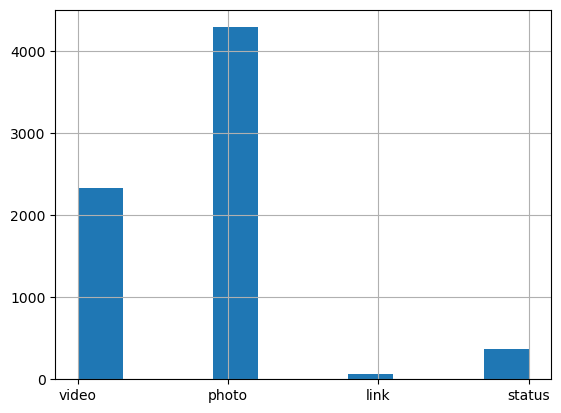

In [10]:
df.status_type.hist();

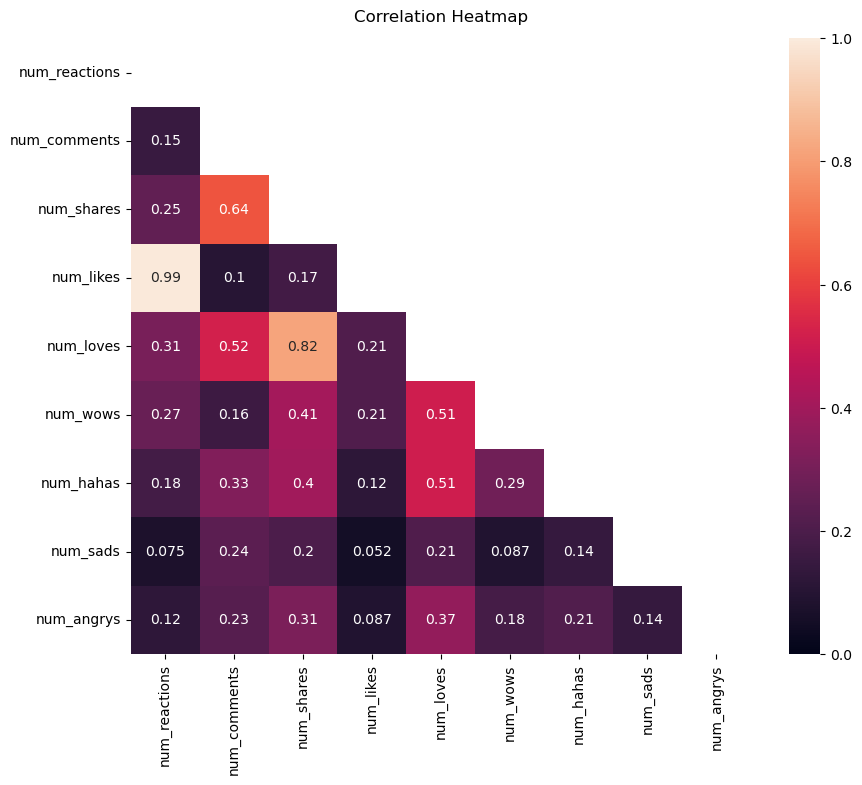

In [14]:
##Figure size:
plt.figure(figsize=(10,8))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True);
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Faig més visualitzacions per entendre les dades

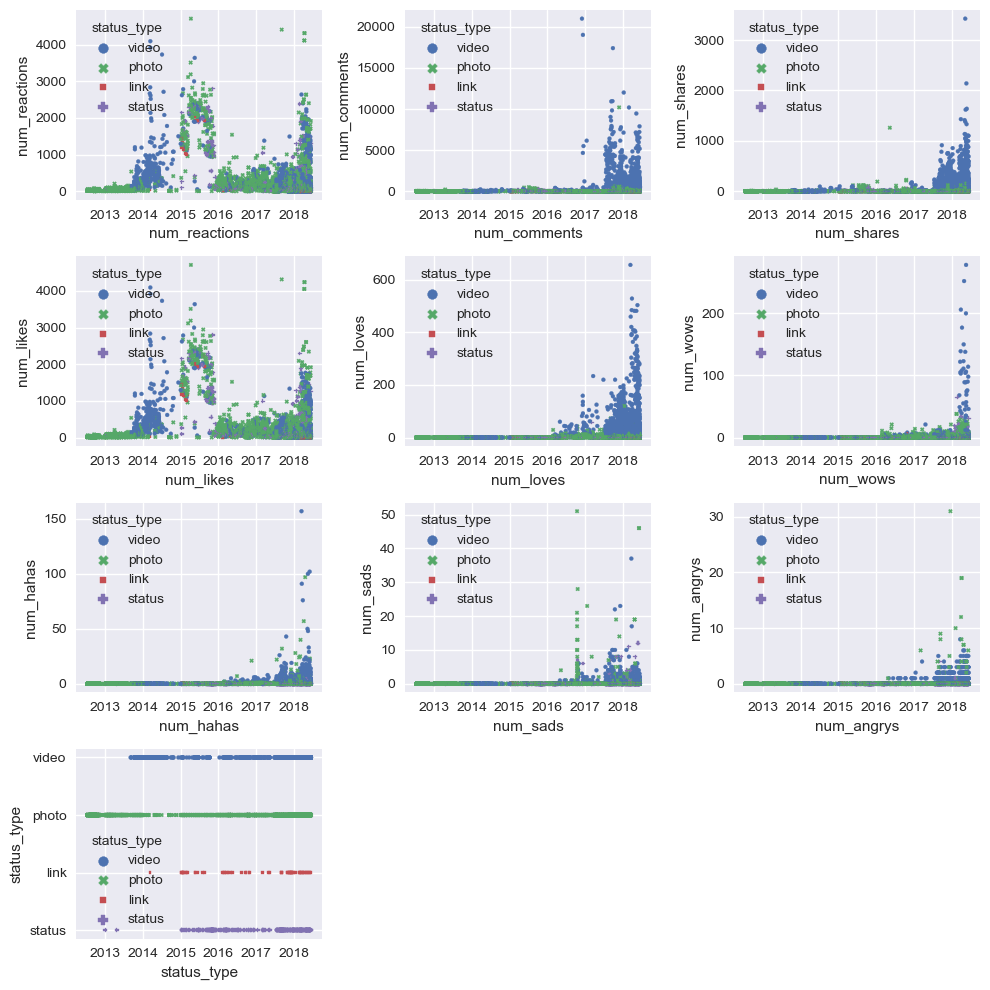

In [48]:
## Figure with several columns in a scattered plot with dat
fig = plt.figure(figsize=(10,10))

columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
            'num_angrys', 'status_type']

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

for i in columns:
    plt.subplot(a,b,c)
    #plt.scatter(df[i], y)
    sns.scatterplot(x = df['date_time'], y = df[i], hue = df['status_type'], style=df['status_type'], s = 8, edgecolor=None)
    #plt.plot_date(df['date'], df[i], '.', markersize = 3, color = 'orange')
    plt.tight_layout()
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

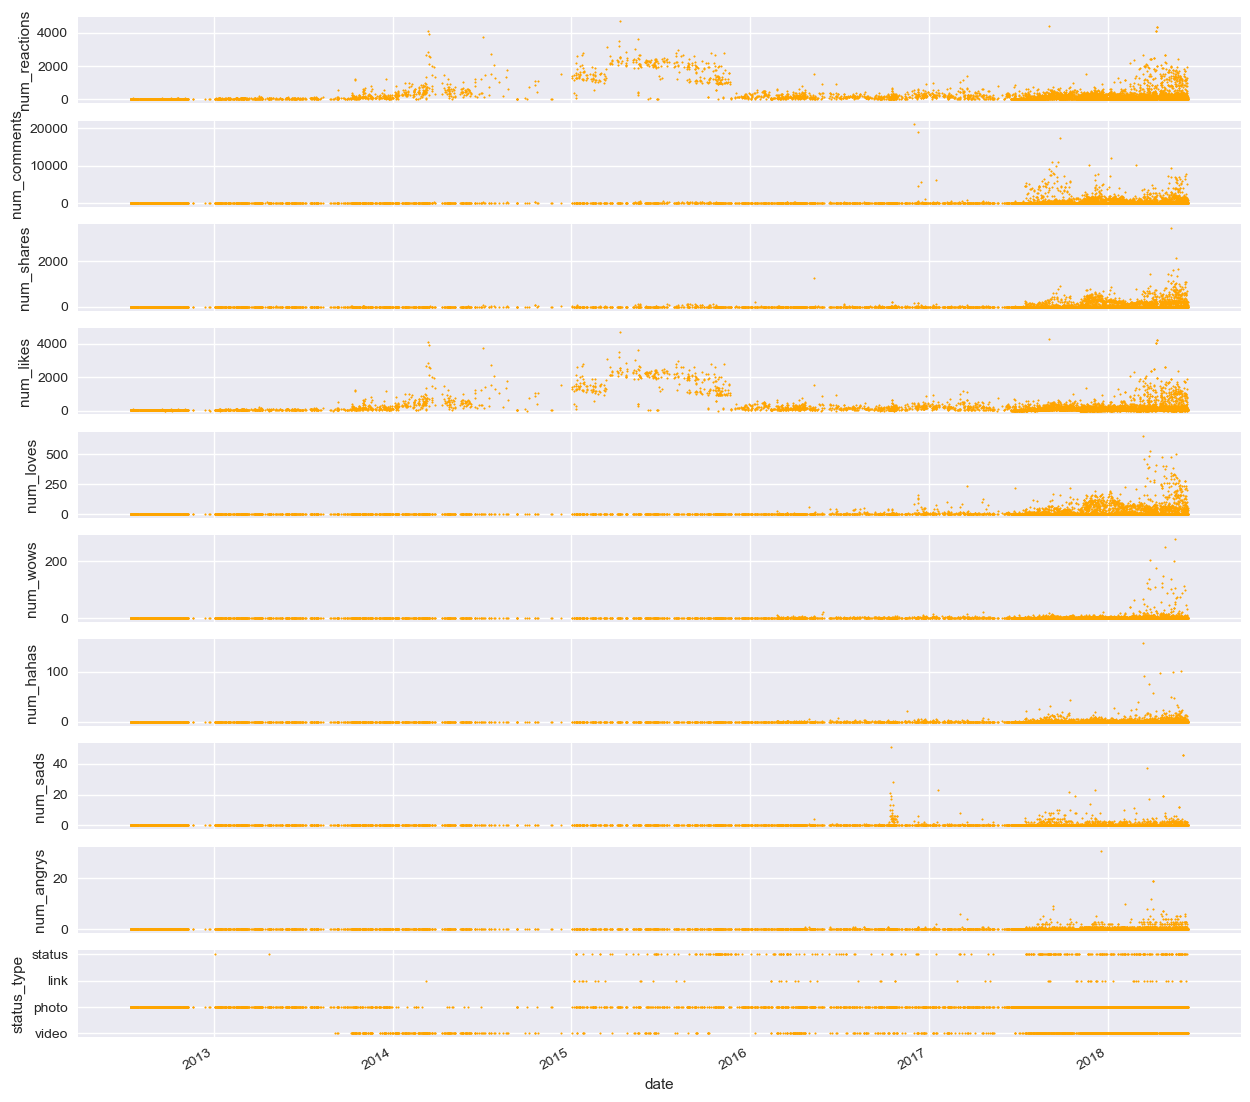

In [49]:
from matplotlib.colors import ListedColormap

# list of column names to plot
columns_to_plot = ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys',
       'status_type']

# create a figure and axis
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(15,15))

# create a colormap for the categories
colors = ['orchid', 'green', 'blue', 'orange']
cmap = ListedColormap(colors)

# loop through each column
for i, column in enumerate(columns_to_plot):

    # plot the data points
    #axs[i].scatter(x = df['date_time'], y = df[i], hue = df['status_type'], style=df['status_type'], s = 8, edgecolor=None)
    axs[i].scatter(df['date_time'], df[column], marker = '.', label=column, color= 'orange',s = 5, edgecolor=None)
    axs[i].set_xlabel('date')
    axs[i].set_ylabel(column)
    axs[i].xaxis_date()
    fig.autofmt_xdate()

# show the plot
plt.show()

### Analisis previ de les dades:

- Veiem que el dataset està molt desbalancejat, hi ha molts més numeros de reaccions, de comentaris de shares i de likes que no pas de reaccions especiofiques com love, haha, angry o sad.

- Aquest fet pot ser degut a que les dades van de del 2012 al 2018, en un inici Facebook no tenia tant tipus de reaccions nopmès el like 👍, a partir del 2016 es van introduir aquestes i van comença a apareixer les reaccions 🧡🙂😂😢😡 que poc a poc han anat tenint més us.

- En el cas de la columna status tipe. Es a dir l'objecta que es fa reacció a veiem que també està desbalancejaty, principalment trobem fotos i videas, i secundariament hi ha links i status.

- També veiem que no hi ha molta correlació entre les dades amb algunes excepcions (number of shares - number of loves)

<div class="alert alert-success h2" role="alert">
    <b>Pre-processat de les dades</b>
</div>


- Faig el test de normalitat nomès a les variables numèriques deixant de banda les dades temporals ja que no té molt sentit, la seva distribució simplement és temporal.

- Pel tema de mirar si les dades són normals o no, no he trobat un test que funcioni gaire bé amb moltes dades. El de Shapiro-Wilks no assegura se estable per un nombre de dades superiror a 5000 samples, que és el nostre cas.

- Defineixo 2 funcions per tal de fer el test de normalitat i plotejar-lo

- Finalment, per tal de tenir una millor visualització plotejaré totes les distribucions i boxplots en conjunt.

In [13]:
# Define a function to check normality
## For checking normality, I used Shapiro-Wilk’s W test which is generally preferred for 
## smaller samples however there are other options like Kolmogorov-Smirnov and D’Agostino and Pearson’s test. 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    #print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        text  = "Reject null hypothesis >> The data is not normally distributed"
        ##print("Reject null hypothesis >> The data is not normally distributed")
    else:
        text = "Fail to reject null hypothesis >> The data is normally distributed"
        ##print("Fail to reject null hypothesis >> The data is normally distributed")
    return text, p_value_normality

##Function to plot the distribution and a boxplot for each column with a loop
#Introduce the df, df[['CRIM', 'ZN']]
##It alsdo includes in the plot the normality test
def plotsPreProcessingNum(df):
    for column in df:
        text = check_normality(df[column])
        #text = 'no normality'
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('OUTLIERS AND DISTRIBUTION OF COLUMN' + '\n\n' + text[0] + '   p_value =' + str(round(text[1], 4)))
        sns.histplot(ax=axes[1], data=df, x=df[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =df[column])

C:\Users\crist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\crist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\crist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\crist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\crist\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\crist\anaconda3\lib\site-packages\scipy\s

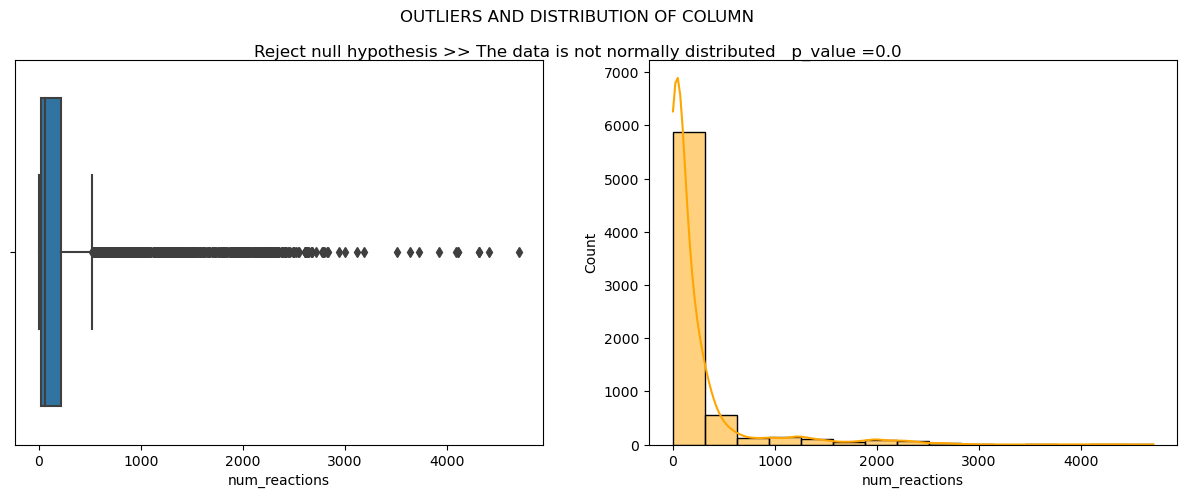

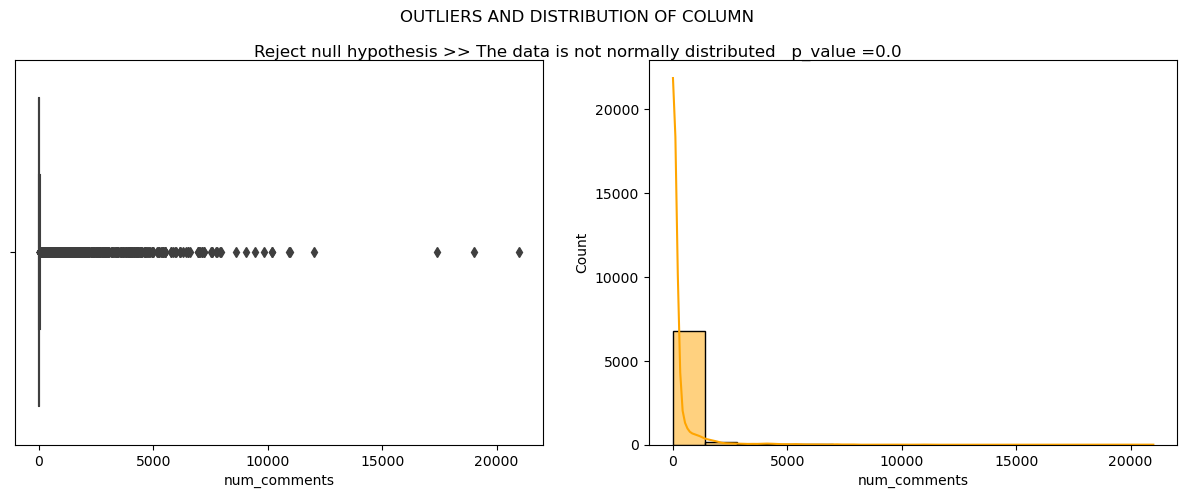

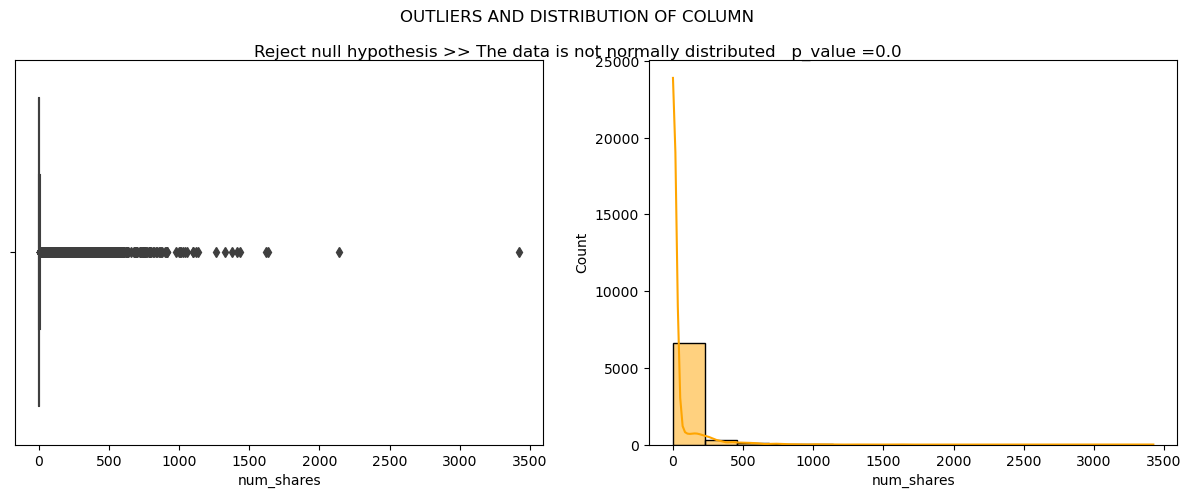

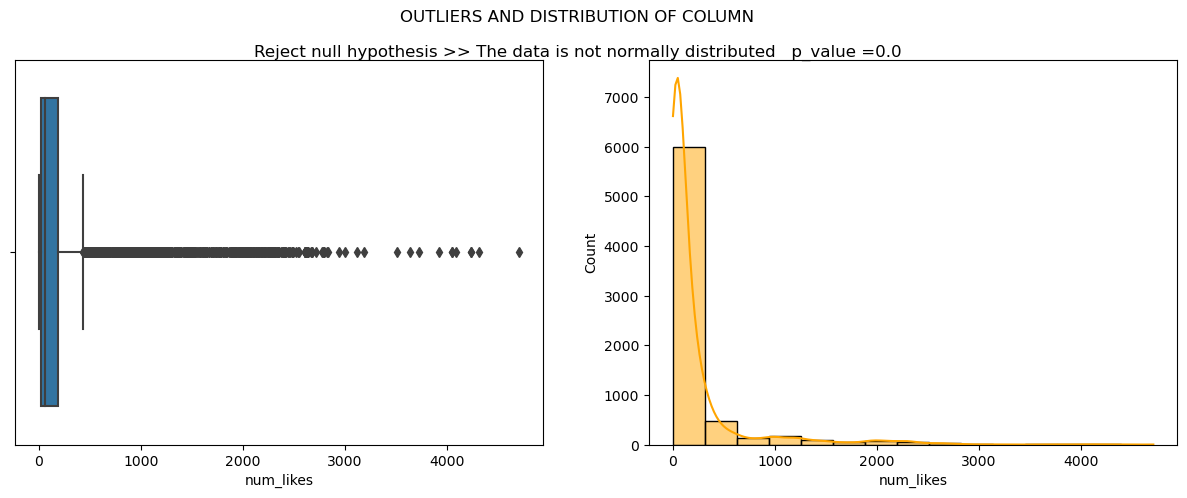

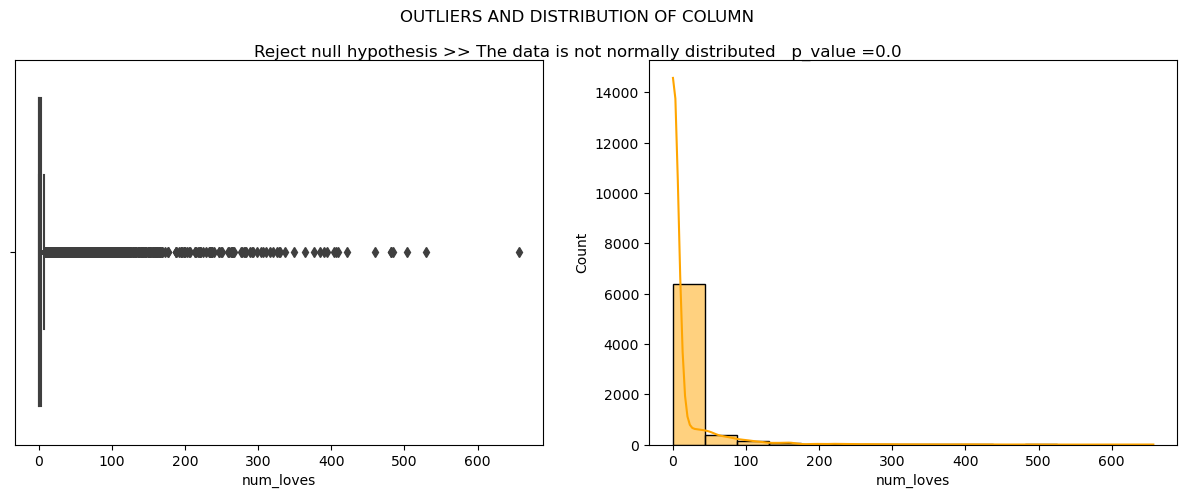

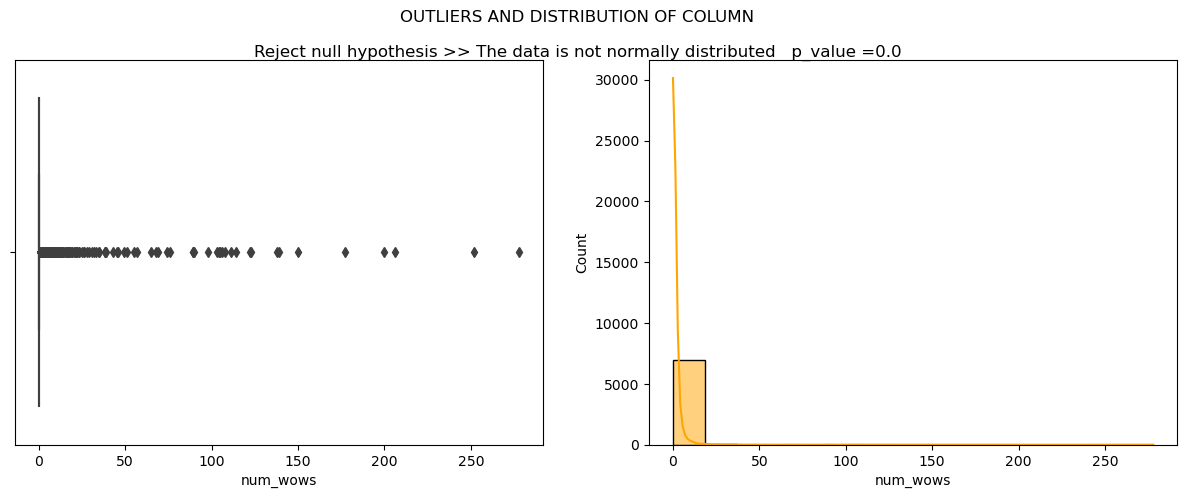

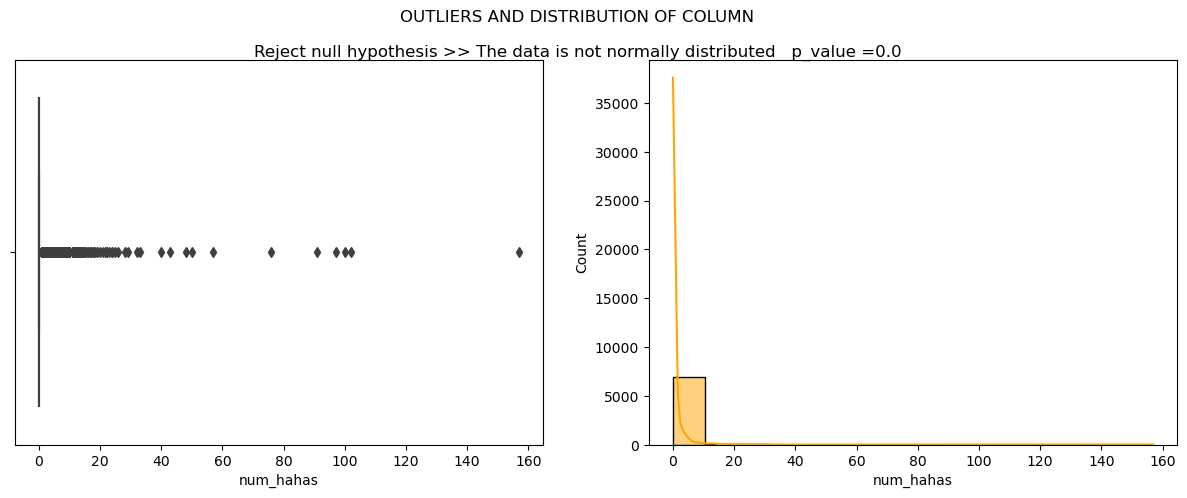

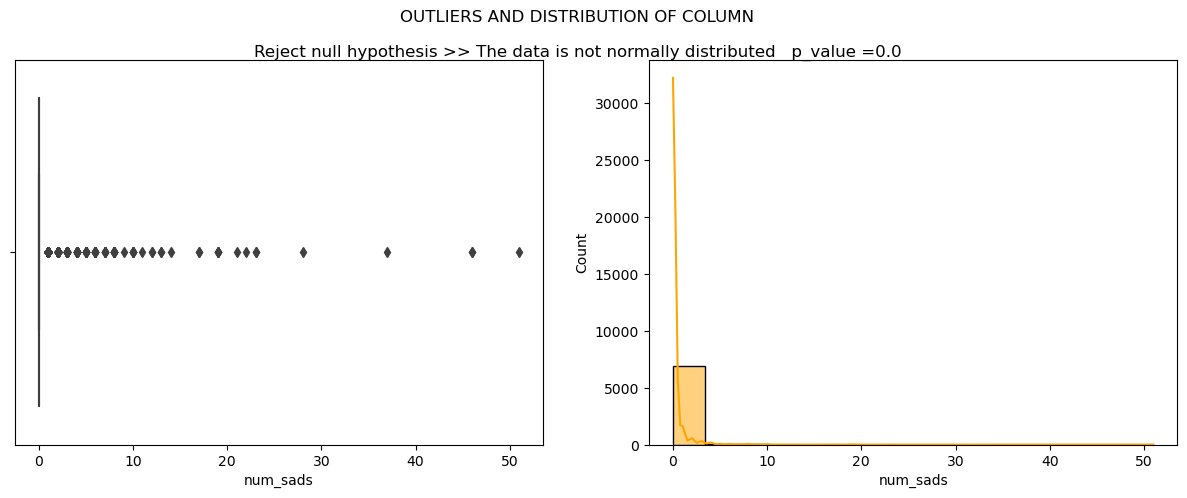

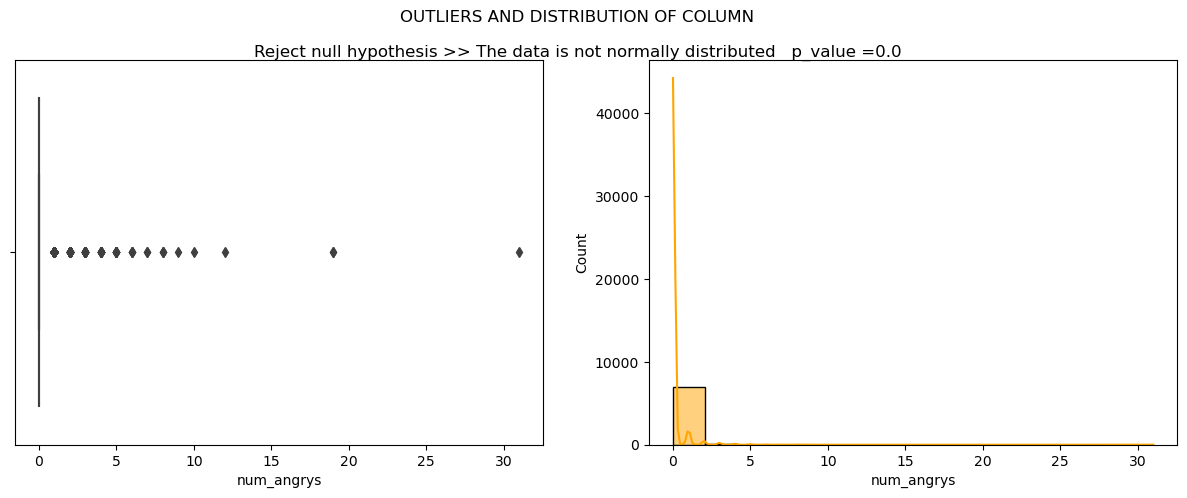

In [16]:
df_columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
            'num_angrys']
plotsPreProcessingNum(df[df_columns])

- El test de normalitat em dona warnings ja que per més de 5000 mostres el metode que utilitzo no és del tot precís, però veuriem que no hi ha cap distribució normal

- Segons els test de normalitat fet, no hi ha cap dada amb distribució normal.

- Plotejo tos els grafics de densistat de les dades per veure si visualment veiem alguna dada que pugui ser normal

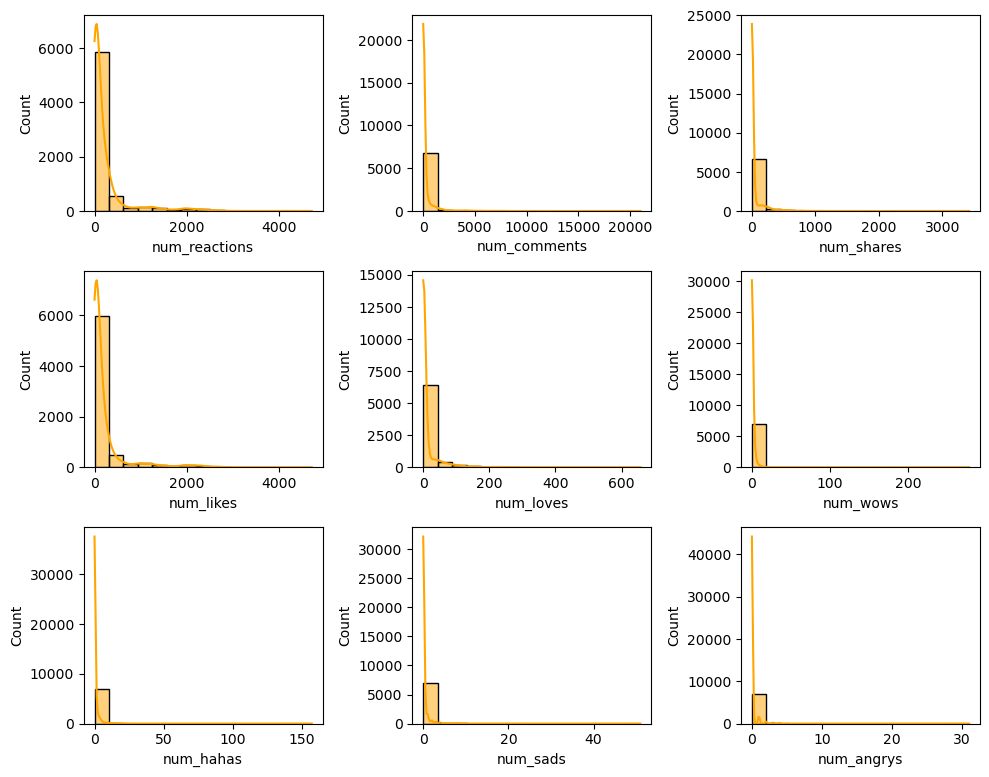

In [18]:
## Figure with several columns in a scattered plot with dat
fig = plt.figure(figsize=(10,10))

df_columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
            'num_angrys']
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

for i in df_columns:
    plt.subplot(a,b,c)
    #plt.scatter(df[i], y)
    sns.histplot(data=df, x=df[i], bins=15, color='orange', kde= True)
    plt.tight_layout()
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

- Veiem que no hi ha cap dada que sembli normal

- I plotejo també els boxplots de cada columna per tenir una idea general de la ditribució de outliers

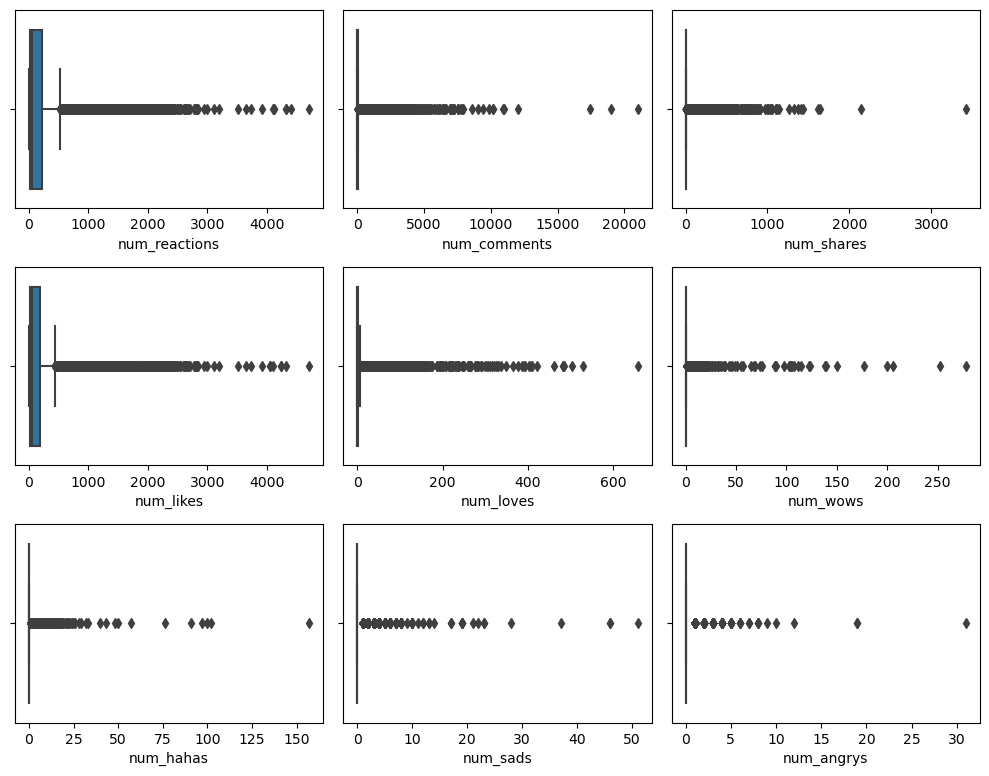

In [17]:
## Figure with several columns in a scattered plot with dat
fig = plt.figure(figsize=(10,10))

df_columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
            'num_angrys']

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

for i in df_columns:
    plt.subplot(a,b,c)
    #plt.scatter(df[i], y)
    sns.boxplot(x = df[i])
    #plt.plot_date(df['date'], df[i], '.', markersize = 3, color = 'orange')
    plt.tight_layout()
    #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    c = c + 1
fig.tight_layout()
plt.show()

- Amb els boxplots veiem que totes es podria dir que tenen outliers


- Aquestews dos grafiques ens diuen que a les dades s'haurà d'aplicar una **Normalització teneint en compte els outliers** --> **Robust Scaler**




### Tractament de les dades de Recaccions

- Com que les dades no son normals i tenen outliers farem servir un Robust scaler

In [153]:
## Creat a dataframe to transfor with the features
X = df.copy()
X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00            529           512         262        432   
1    2018-04-21 22:45:00            150             0           0        150   
2    2018-04-21 06:17:00            227           236          57        204   
3    2018-04-21 02:29:00            111             0           0        111   
4    2018-04-18 03:22:00            213             0           0        204   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00             89             0           0         89   
7046 2016-09-23 11:19:00             16             0           0         14   
7047 2016-09-21 23:03:00              2             0           0          1   
7048 2016-09-20 00:43:00            351            12          22        349   
7049 2016-09-10 10:30:00             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys status_type  
0            92         3          1         1           0       video  
1             0         0          0         0           0       photo  
2            21         1          1         0           0       video  
3             0         0          0         0           0       photo  
4             9         0          0         0           0       photo  
...         ...       ...        ...       ...         ...         ...  
7045          0         0          0         0           0       photo  
7046          1         0          1         0           0       photo  
7047          1         0          0         0           0       photo  
7048          2         0          0         0           0       photo  
7049          0         0          0         0           0       photo  

[7050 rows x 11 columns]

In [154]:
## Columns to transform with robust scaler
##All calumns have outliers, so we can use the same list as before
df_columns = ['num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 
            'num_angrys']


## Normalization with outliers
transformer = preprocessing.RobustScaler()
## Fit and transform the data and put itinplace of the same columns
X[df_columns] = transformer.fit_transform(X[df_columns])
X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00       2.324257     22.086957       65.50   2.229508   
1    2018-04-21 22:45:00       0.448020     -0.173913        0.00   0.548435   
2    2018-04-21 06:17:00       0.829208     10.086957       14.25   0.870343   
3    2018-04-21 02:29:00       0.254950     -0.173913        0.00   0.315946   
4    2018-04-18 03:22:00       0.759901     -0.173913        0.00   0.870343   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00       0.146040     -0.173913        0.00   0.184799   
7046 2016-09-23 11:19:00      -0.215347     -0.173913        0.00  -0.262295   
7047 2016-09-21 23:03:00      -0.284653     -0.173913        0.00  -0.339791   
7048 2016-09-20 00:43:00       1.443069      0.347826        5.50   1.734724   
7049 2016-09-10 10:30:00      -0.210396     -0.173913        0.00  -0.244411   

      num_loves  num_wows  num_hahas  num_sads  num_angrys status_type  
0     30.666667       3.0        1.0       1.0         0.0       video  
1      0.000000       0.0        0.0       0.0         0.0       photo  
2      7.000000       1.0        1.0       0.0         0.0       video  
3      0.000000       0.0        0.0       0.0         0.0       photo  
4      3.000000       0.0        0.0       0.0         0.0       photo  
...         ...       ...        ...       ...         ...         ...  
7045   0.000000       0.0        0.0       0.0         0.0       photo  
7046   0.333333       0.0        1.0       0.0         0.0       photo  
7047   0.333333       0.0        0.0       0.0         0.0       photo  
7048   0.666667       0.0        0.0       0.0         0.0       photo  
7049   0.000000       0.0        0.0       0.0         0.0       photo  

[7050 rows x 11 columns]

### Tractament dades categoriques

- Per la columna status type l'hem de codificar. 

- Podem utilitzar label encoder o One-Hot
- Utilitzem Dummies/One Hote ja que les dades no son ordenades i si fessim un Label encoder ens sortirien ordenades

In [155]:
## Convert categorical data into numbers from status type column
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
dfdummies = pd.get_dummies(df['status_type'])

# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
X = pd.concat([X, dfdummies], axis=1).reindex(df.index)
#droping the status_type column 
X = X.drop(['status_type'], axis=1) 
X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00       2.324257     22.086957       65.50   2.229508   
1    2018-04-21 22:45:00       0.448020     -0.173913        0.00   0.548435   
2    2018-04-21 06:17:00       0.829208     10.086957       14.25   0.870343   
3    2018-04-21 02:29:00       0.254950     -0.173913        0.00   0.315946   
4    2018-04-18 03:22:00       0.759901     -0.173913        0.00   0.870343   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00       0.146040     -0.173913        0.00   0.184799   
7046 2016-09-23 11:19:00      -0.215347     -0.173913        0.00  -0.262295   
7047 2016-09-21 23:03:00      -0.284653     -0.173913        0.00  -0.339791   
7048 2016-09-20 00:43:00       1.443069      0.347826        5.50   1.734724   
7049 2016-09-10 10:30:00      -0.210396     -0.173913        0.00  -0.244411   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  link  photo  \
0     30.666667       3.0        1.0       1.0         0.0     0      0   
1      0.000000       0.0        0.0       0.0         0.0     0      1   
2      7.000000       1.0        1.0       0.0         0.0     0      0   
3      0.000000       0.0        0.0       0.0         0.0     0      1   
4      3.000000       0.0        0.0       0.0         0.0     0      1   
...         ...       ...        ...       ...         ...   ...    ...   
7045   0.000000       0.0        0.0       0.0         0.0     0      1   
7046   0.333333       0.0        1.0       0.0         0.0     0      1   
7047   0.333333       0.0        0.0       0.0         0.0     0      1   
7048   0.666667       0.0        0.0       0.0         0.0     0      1   
7049   0.000000       0.0        0.0       0.0         0.0     0      1   

      status  video  
0          0      1  
1          0      0  
2          0      1  
3          0      0  
4          0      0  
...      ...    ...  
7045       0      0  
7046       0      0  
7047       0      0  
7048       0      0  
7049       0      0  

[7050 rows x 14 columns]

### Tractament de Dades Temporals --> Cyclical features encoding !!

- Les dades temporals, al ser dades cycliques, és adir, que es repeteixen en el temps, requereixen d'un tractament especial.

- A aquestes dades es codifiquen utilitzant les transformacions trigonomètriques del sinus i cosinus.



#### Creació d'una funció que ens permeti codificar dades cicliques

- En aquesta funció aplicarem el sinus o cosinus a dades que han sigut normalitzades en el cicle 0 - 2π
- La funció crea dos columnes noves amb els valors de sinus i cosinus


In [156]:
## Function to encode sine and cosine transformation
## need numpy np for this function
## Hour: max_val = 60
## Day: max_val = 31
## Month: max_val = 12
def encodeCyclical(data, col):
    max_val = data[col].max()
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val) ##apply sin to normalize values to match with the 0-2π cycle
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [157]:
X = X.copy()
X['month'] = X.date_time.dt.month
data = encodeCyclical(X, 'month')
X['day'] = X.date_time.dt.day
data = encodeCyclical(X, 'day')


X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00       2.324257     22.086957       65.50   2.229508   
1    2018-04-21 22:45:00       0.448020     -0.173913        0.00   0.548435   
2    2018-04-21 06:17:00       0.829208     10.086957       14.25   0.870343   
3    2018-04-21 02:29:00       0.254950     -0.173913        0.00   0.315946   
4    2018-04-18 03:22:00       0.759901     -0.173913        0.00   0.870343   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00       0.146040     -0.173913        0.00   0.184799   
7046 2016-09-23 11:19:00      -0.215347     -0.173913        0.00  -0.262295   
7047 2016-09-21 23:03:00      -0.284653     -0.173913        0.00  -0.339791   
7048 2016-09-20 00:43:00       1.443069      0.347826        5.50   1.734724   
7049 2016-09-10 10:30:00      -0.210396     -0.173913        0.00  -0.244411   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  link  photo  \
0     30.666667       3.0        1.0       1.0         0.0     0      0   
1      0.000000       0.0        0.0       0.0         0.0     0      1   
2      7.000000       1.0        1.0       0.0         0.0     0      0   
3      0.000000       0.0        0.0       0.0         0.0     0      1   
4      3.000000       0.0        0.0       0.0         0.0     0      1   
...         ...       ...        ...       ...         ...   ...    ...   
7045   0.000000       0.0        0.0       0.0         0.0     0      1   
7046   0.333333       0.0        1.0       0.0         0.0     0      1   
7047   0.333333       0.0        0.0       0.0         0.0     0      1   
7048   0.666667       0.0        0.0       0.0         0.0     0      1   
7049   0.000000       0.0        0.0       0.0         0.0     0      1   

      status  video  month  month_sin     month_cos  day   day_sin   day_cos  
0          0      1      4   0.866025 -5.000000e-01   22 -0.968077 -0.250653  
1          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394  
2          0      1      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394  
3          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394  
4          0      0      4   0.866025 -5.000000e-01   18 -0.485302 -0.874347  
...      ...    ...    ...        ...           ...  ...       ...       ...  
7045       0      0      9  -1.000000 -1.836970e-16   24 -0.988468  0.151428  
7046       0      0      9  -1.000000 -1.836970e-16   23 -0.998717 -0.050649  
7047       0      0      9  -1.000000 -1.836970e-16   21 -0.897805 -0.440394  
7048       0      0      9  -1.000000 -1.836970e-16   20 -0.790776 -0.612106  
7049       0      0      9  -1.000000 -1.836970e-16   10  0.897805 -0.440394  

[7050 rows x 20 columns]

- Afegeixo les dades de l'any per no perdreles, i les codifico amb label encoder

In [158]:
X['year'] = df.date_time.dt.year
X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00       2.324257     22.086957       65.50   2.229508   
1    2018-04-21 22:45:00       0.448020     -0.173913        0.00   0.548435   
2    2018-04-21 06:17:00       0.829208     10.086957       14.25   0.870343   
3    2018-04-21 02:29:00       0.254950     -0.173913        0.00   0.315946   
4    2018-04-18 03:22:00       0.759901     -0.173913        0.00   0.870343   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00       0.146040     -0.173913        0.00   0.184799   
7046 2016-09-23 11:19:00      -0.215347     -0.173913        0.00  -0.262295   
7047 2016-09-21 23:03:00      -0.284653     -0.173913        0.00  -0.339791   
7048 2016-09-20 00:43:00       1.443069      0.347826        5.50   1.734724   
7049 2016-09-10 10:30:00      -0.210396     -0.173913        0.00  -0.244411   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  ...  photo  \
0     30.666667       3.0        1.0       1.0         0.0  ...      0   
1      0.000000       0.0        0.0       0.0         0.0  ...      1   
2      7.000000       1.0        1.0       0.0         0.0  ...      0   
3      0.000000       0.0        0.0       0.0         0.0  ...      1   
4      3.000000       0.0        0.0       0.0         0.0  ...      1   
...         ...       ...        ...       ...         ...  ...    ...   
7045   0.000000       0.0        0.0       0.0         0.0  ...      1   
7046   0.333333       0.0        1.0       0.0         0.0  ...      1   
7047   0.333333       0.0        0.0       0.0         0.0  ...      1   
7048   0.666667       0.0        0.0       0.0         0.0  ...      1   
7049   0.000000       0.0        0.0       0.0         0.0  ...      1   

      status  video  month  month_sin     month_cos  day   day_sin   day_cos  \
0          0      1      4   0.866025 -5.000000e-01   22 -0.968077 -0.250653   
1          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
2          0      1      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
3          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
4          0      0      4   0.866025 -5.000000e-01   18 -0.485302 -0.874347   
...      ...    ...    ...        ...           ...  ...       ...       ...   
7045       0      0      9  -1.000000 -1.836970e-16   24 -0.988468  0.151428   
7046       0      0      9  -1.000000 -1.836970e-16   23 -0.998717 -0.050649   
7047       0      0      9  -1.000000 -1.836970e-16   21 -0.897805 -0.440394   
7048       0      0      9  -1.000000 -1.836970e-16   20 -0.790776 -0.612106   
7049       0      0      9  -1.000000 -1.836970e-16   10  0.897805 -0.440394   

      year  
0     2018  
1     2018  
2     2018  
3     2018  
4     2018  
...    ...  
7045  2016  
7046  2016  
7047  2016  
7048  2016  
7049  2016  

[7050 rows x 21 columns]

In [159]:

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
X['year']= label_encoder.fit_transform(X['year']) 

X

date_time  num_reactions  num_comments  num_shares  num_likes  \
0    2018-04-22 06:00:00       2.324257     22.086957       65.50   2.229508   
1    2018-04-21 22:45:00       0.448020     -0.173913        0.00   0.548435   
2    2018-04-21 06:17:00       0.829208     10.086957       14.25   0.870343   
3    2018-04-21 02:29:00       0.254950     -0.173913        0.00   0.315946   
4    2018-04-18 03:22:00       0.759901     -0.173913        0.00   0.870343   
...                  ...            ...           ...         ...        ...   
7045 2016-09-24 02:58:00       0.146040     -0.173913        0.00   0.184799   
7046 2016-09-23 11:19:00      -0.215347     -0.173913        0.00  -0.262295   
7047 2016-09-21 23:03:00      -0.284653     -0.173913        0.00  -0.339791   
7048 2016-09-20 00:43:00       1.443069      0.347826        5.50   1.734724   
7049 2016-09-10 10:30:00      -0.210396     -0.173913        0.00  -0.244411   

      num_loves  num_wows  num_hahas  num_sads  num_angrys  ...  photo  \
0     30.666667       3.0        1.0       1.0         0.0  ...      0   
1      0.000000       0.0        0.0       0.0         0.0  ...      1   
2      7.000000       1.0        1.0       0.0         0.0  ...      0   
3      0.000000       0.0        0.0       0.0         0.0  ...      1   
4      3.000000       0.0        0.0       0.0         0.0  ...      1   
...         ...       ...        ...       ...         ...  ...    ...   
7045   0.000000       0.0        0.0       0.0         0.0  ...      1   
7046   0.333333       0.0        1.0       0.0         0.0  ...      1   
7047   0.333333       0.0        0.0       0.0         0.0  ...      1   
7048   0.666667       0.0        0.0       0.0         0.0  ...      1   
7049   0.000000       0.0        0.0       0.0         0.0  ...      1   

      status  video  month  month_sin     month_cos  day   day_sin   day_cos  \
0          0      1      4   0.866025 -5.000000e-01   22 -0.968077 -0.250653   
1          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
2          0      1      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
3          0      0      4   0.866025 -5.000000e-01   21 -0.897805 -0.440394   
4          0      0      4   0.866025 -5.000000e-01   18 -0.485302 -0.874347   
...      ...    ...    ...        ...           ...  ...       ...       ...   
7045       0      0      9  -1.000000 -1.836970e-16   24 -0.988468  0.151428   
7046       0      0      9  -1.000000 -1.836970e-16   23 -0.998717 -0.050649   
7047       0      0      9  -1.000000 -1.836970e-16   21 -0.897805 -0.440394   
7048       0      0      9  -1.000000 -1.836970e-16   20 -0.790776 -0.612106   
7049       0      0      9  -1.000000 -1.836970e-16   10  0.897805 -0.440394   

      year  
0        6  
1        6  
2        6  
3        6  
4        6  
...    ...  
7045     4  
7046     4  
7047     4  
7048     4  
7049     4  

[7050 rows x 21 columns]

In [160]:
#droping the date_time, month and day columns 
X = X.drop(['date_time', 'month', 'day'], axis=1) 
X

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  photo  status  video  month_sin  \
0           1.0       1.0         0.0     0      0       0      1   0.866025   
1           0.0       0.0         0.0     0      1       0      0   0.866025   
2           1.0       0.0         0.0     0      0       0      1   0.866025   
3           0.0       0.0         0.0     0      1       0      0   0.866025   
4           0.0       0.0         0.0     0      1       0      0   0.866025   
...         ...       ...         ...   ...    ...     ...    ...        ...   
7045        0.0       0.0         0.0     0      1       0      0  -1.000000   
7046        1.0       0.0         0.0     0      1       0      0  -1.000000   
7047        0.0       0.0         0.0     0      1       0      0  -1.000000   
7048        0.0       0.0         0.0     0      1       0      0  -1.000000   
7049        0.0       0.0         0.0     0      1       0      0  -1.000000   

         month_cos   day_sin   day_cos  year  
0    -5.000000e-01 -0.968077 -0.250653     6  
1    -5.000000e-01 -0.897805 -0.440394     6  
2    -5.000000e-01 -0.897805 -0.440394     6  
3    -5.000000e-01 -0.897805 -0.440394     6  
4    -5.000000e-01 -0.485302 -0.874347     6  
...            ...       ...       ...   ...  
7045 -1.836970e-16 -0.988468  0.151428     4  
7046 -1.836970e-16 -0.998717 -0.050649     4  
7047 -1.836970e-16 -0.897805 -0.440394     4  
7048 -1.836970e-16 -0.790776 -0.612106     4  
7049 -1.836970e-16  0.897805 -0.440394     4  

[7050 rows x 18 columns]

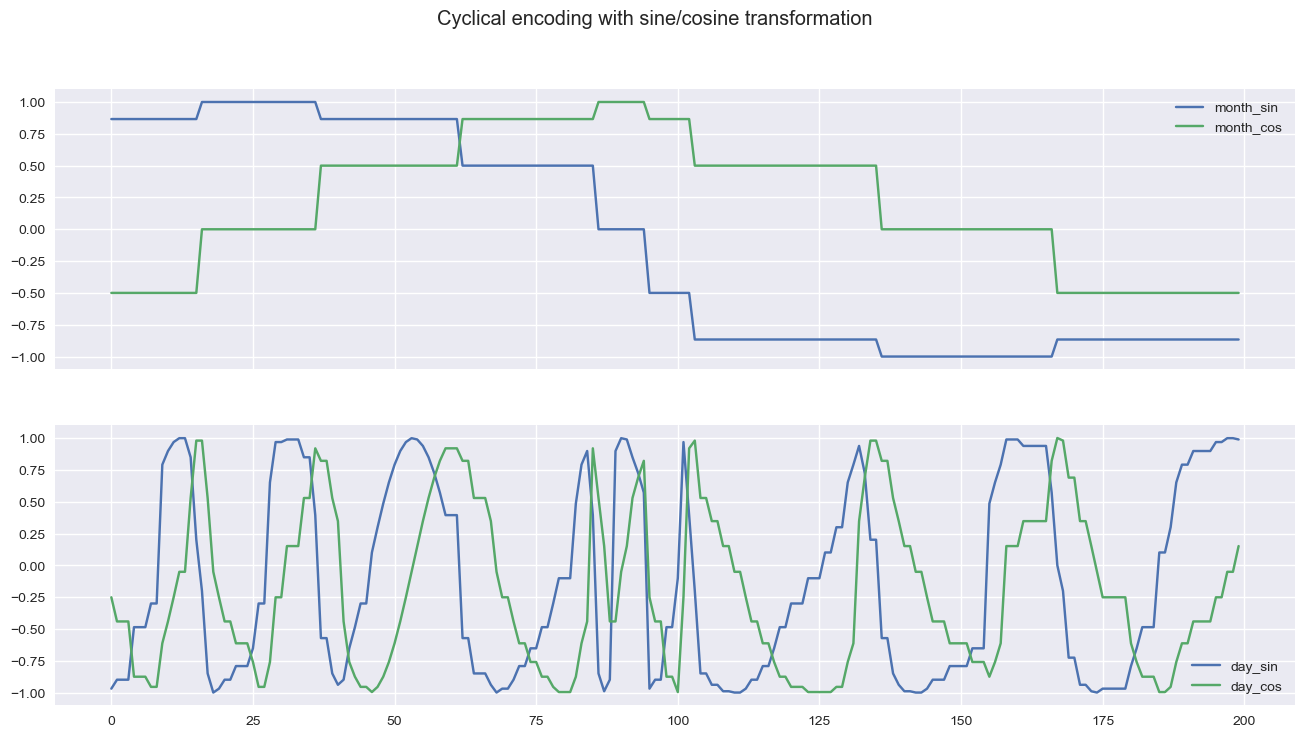

In [161]:
## Here I plot a sample of the day and month data
plt.style.use('seaborn')

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(16,8))
X[["month_sin", "month_cos"]][0:200].plot(ax=ax[0])
X[["day_sin", "day_cos"]][0:200].plot(ax=ax[1])
plt.suptitle("Cyclical encoding with sine/cosine transformation");

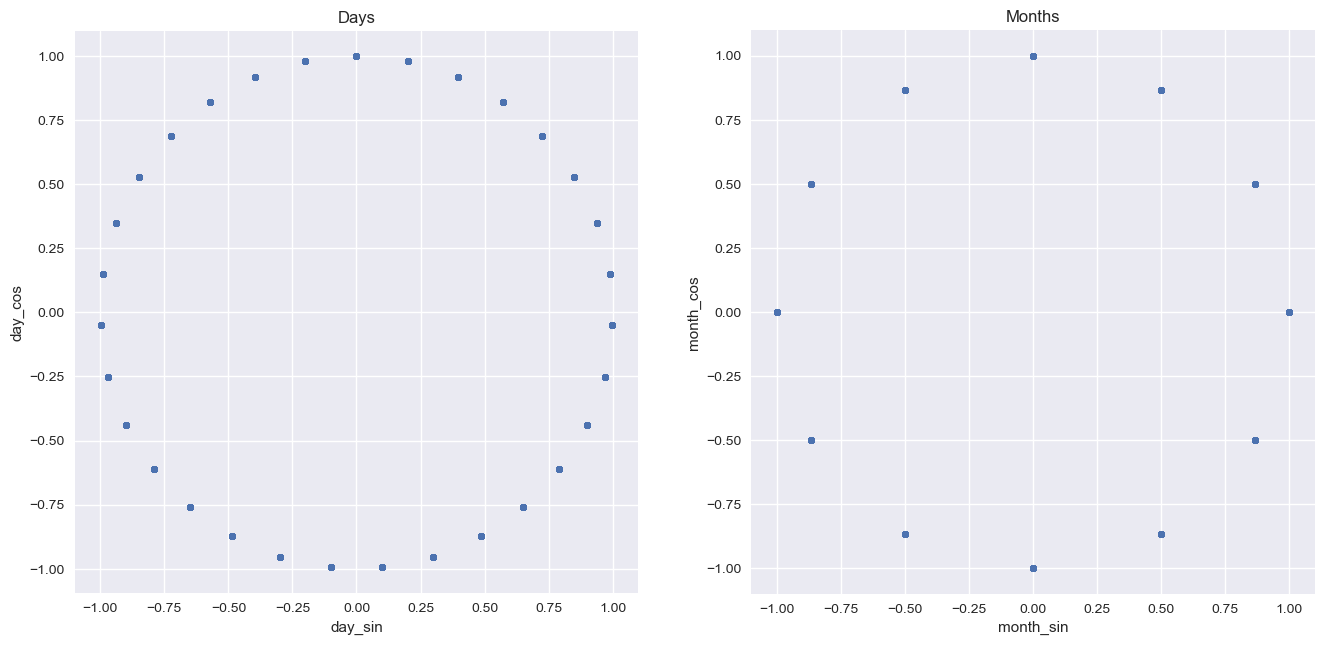

In [47]:
fig, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(16,8))
ax1.set_title('Days')
X.plot.scatter('day_sin', 'day_cos', ax = ax1).set_aspect('equal')
ax2.set_title('Months')
X.plot.scatter('month_sin', 'month_cos', ax = ax2).set_aspect('equal')


In [162]:
X.describe().round(3).T

count    mean     std    min    25%    50%    75%      max
num_reactions  7050.0   0.845   2.290 -0.295 -0.210  0.000  0.790   23.022
num_comments   7050.0   9.581  38.680 -0.174 -0.174  0.000  0.826  912.435
num_shares     7050.0  10.006  32.900  0.000  0.000  0.000  1.000  856.000
num_likes      7050.0   0.936   2.679 -0.346 -0.244  0.000  0.756   27.732
num_loves      7050.0   4.243  13.324  0.000  0.000  0.000  1.000  219.000
num_wows       7050.0   1.289   8.720  0.000  0.000  0.000  0.000  278.000
num_hahas      7050.0   0.696   3.957  0.000  0.000  0.000  0.000  157.000
num_sads       7050.0   0.244   1.597  0.000  0.000  0.000  0.000   51.000
num_angrys     7050.0   0.113   0.727  0.000  0.000  0.000  0.000   31.000
link           7050.0   0.009   0.094  0.000  0.000  0.000  0.000    1.000
photo          7050.0   0.608   0.488  0.000  0.000  1.000  1.000    1.000
status         7050.0   0.052   0.222  0.000  0.000  0.000  0.000    1.000
video          7050.0   0.331   0.471  0.000  0.000  0.000  1.000    1.000
month_sin      7050.0   0.067   0.685 -1.000 -0.500  0.000  0.866    1.000
month_cos      7050.0   0.043   0.725 -1.000 -0.500  0.000  0.866    1.000
day_sin        7050.0  -0.010   0.730 -0.999 -0.725 -0.000  0.725    0.999
day_cos        7050.0  -0.020   0.683 -0.995 -0.612 -0.051  0.689    1.000
year           7050.0   4.382   1.943  0.000  4.000  5.000  6.000    6.000

<div class="alert alert-success h2" role="alert">
    <b>Now is time for PCA!!! :)</b>
</div>

In [163]:
X.shape

(7050, 18)

### Escollir el numero de components

- **First, we must fit our standardized data using PCA**


- **Second, we need to decide how many features we’d like to keep based on the cumulative variance plot.**


- A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data. This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:


In [52]:
## fit our Normalized data using PCA
# perform PCA on the dataset
pca = PCA().fit(X)


In [53]:
## The Cumulative variance show how much variance 
##is explained by each of the n attributs the data have

pca.explained_variance_ratio_

array([7.78183578e-01, 1.71545438e-01, 2.56500613e-02, 1.37110821e-02,
       3.98889586e-03, 3.86049868e-03, 1.26981420e-03, 8.29879926e-04,
       1.96527302e-04, 1.78243061e-04, 1.58242674e-04, 1.56501342e-04,
       1.28790380e-04, 1.13721779e-04, 2.46903205e-05, 4.03484981e-06,
       3.46892520e-11, 4.72255942e-36])

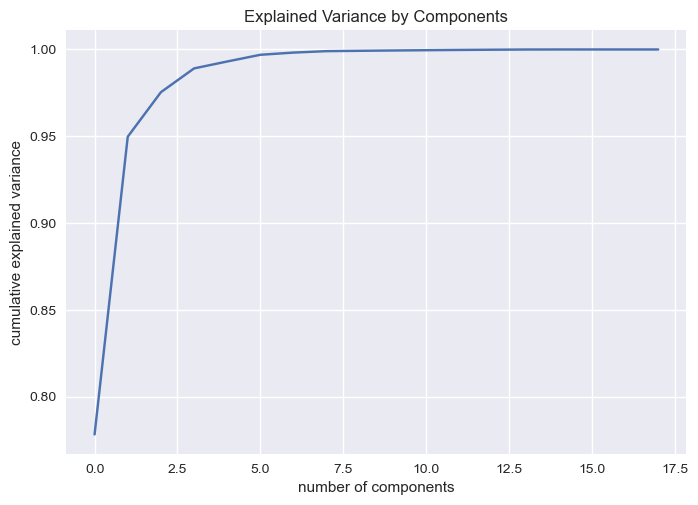

In [54]:
## Plot explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- Veiem que amb 2 components ens quedem amb més del 95% de la informció, aixi que perfecte, no en necessitem més!

In [55]:
## Choose the number of components
pca = PCA(n_components = 2)  #
##Now we can fit and transform the data
## The fit learns some quantities from the data, most importantly the "components" and "explained variance"
X_pca = pca.fit_transform(X)

##Recheck shapes
print(X.shape)
print(X_pca.shape)

(7050, 18)
(7050, 2)


In [56]:
## Shoing the components again the explained variance and the features array
print(pca.components_)
print(pca.explained_variance_)
print(X_pca)

[[ 1.08053080e-02  7.59954298e-01  6.11588847e-01  8.65330952e-03
   2.08529176e-01  5.83862044e-02  3.42098071e-02  8.31978925e-03
   4.58028442e-03 -5.44625140e-05 -3.66700400e-03 -2.94968613e-04
   4.01643513e-03  3.53427569e-04 -5.10840377e-04  2.19227967e-04
  -1.20385930e-04  7.27474623e-03]
 [ 1.63130469e-02 -6.47294922e-01  6.94923741e-01  1.36952053e-02
   2.72669043e-01  1.49846915e-01  2.68808927e-02 -1.49914202e-03
   4.62056550e-03 -2.39920010e-05 -2.20777225e-03 -2.34148853e-04
   2.46591310e-03  4.18278456e-03 -1.24737987e-03 -2.24784262e-04
  -2.46325714e-04  7.59911669e-03]]
[2233.045021   492.2600494]
[[ 49.11434357  37.9983372 ]
 [-14.51701767  -2.00486568]
 [  3.56280342   3.35670059]
 ...
 [-14.47857522  -1.96171968]
 [-10.61216481   1.67014506]
 [-14.54606357  -2.05049537]]


<div class="alert alert-success h2" role="alert">
    <b>Now is k-Means turn!! with the Elbow and Silouette!!! :)</b>
</div>


- We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

- 1st, we need to decide how many clusters we want, I'll do it with **Elbow Methode**

    - In order to do so, we run the algorithm with a different number of clusters. Then, we determine the **Within Cluster Sum of Squares or WCSS** for each solution. Based on the values of the WCSS and an approach known as the Elbow method, we make a decision about how many clusters we’d like to keep.
    - First, however, we must decide how many clustering solutions we’d test.

    - There is no general ruling on this issue. It really depends on the data. In our case, we test an algorithm with up to 20 clusters.


- The next step involves plotting the WCSS against the number of components on a graph.


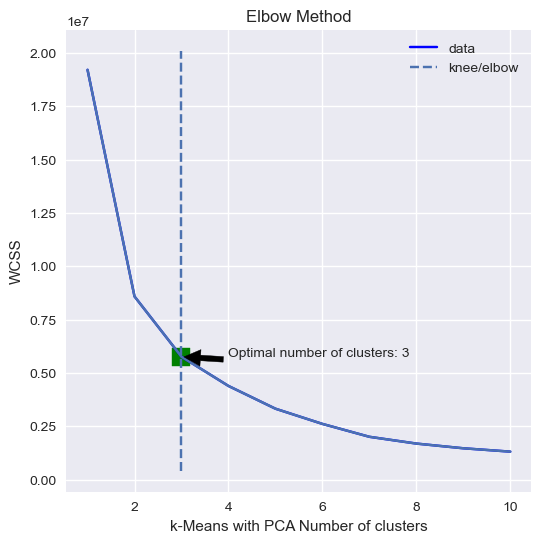

In [57]:
# create an empty list to store WCSS values
wcss = []


# fit k-means clustering on the PCA-transformed dataset and calculate WCSS for each k value
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_pca.fit(X_pca)
    wcss.append(kmeans_pca.inertia_)

# find the knee point on the WCSS curve
kneedle = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kneedle.plot_knee()

# plot the WCSS curve and the knee point
#plt.plot(range(1, 11), wcss, linestyle ='--', color = 'orange')
plt.plot(range(1, 11), wcss)
# Plotting the optimal number of clusters
optimal_clusters = kneedle.knee
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], s=150, c='g', marker='s')
plt.title('Elbow Method')
plt.xlabel('k-Means with PCA Number of clusters')
plt.ylabel('WCSS')
plt.annotate(f'Optimal number of clusters: {optimal_clusters}', xy=(optimal_clusters, wcss[optimal_clusters-1]), 
             xytext=(optimal_clusters+1, wcss[optimal_clusters-1]),
               arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()



In [58]:
print("Optimal number of clusters:", optimal_clusters.round(3))

Optimal number of clusters: 3


In [59]:
print(round(kneedle.knee, 3))
print(round(kneedle.elbow, 3))

3
3


In [60]:
## I inicialice the Kmeans clustering with 3 clusters
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
##Fit the kmeans to the data to find the clusters
kmeans_pca.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [63]:
## The kmeans resulting labels and cluster centers
kmeans_pca_labels = kmeans_pca.labels_
cluster_centers = kmeans_pca.cluster_centers_

In [66]:
print(kmeans_pca_labels)
print(cluster_centers)

[1 0 0 ... 0 0 0]
[[-10.86263643  -1.07621428]
 [ 97.60849891  22.63213354]
 [325.10998122 -54.74039922]]


In [67]:
# Calculate silhouette score
ss_all = []
for n in range(2, 11):
    km = (KMeans(n_clusters = n, init='k-means++', n_init = 10, max_iter=300, 
                        tol=0.0001, random_state= 19))
    predict = km.fit_predict(X_pca)
    score = silhouette_score(X = X_pca, labels = predict)
    ss_all.append(score)

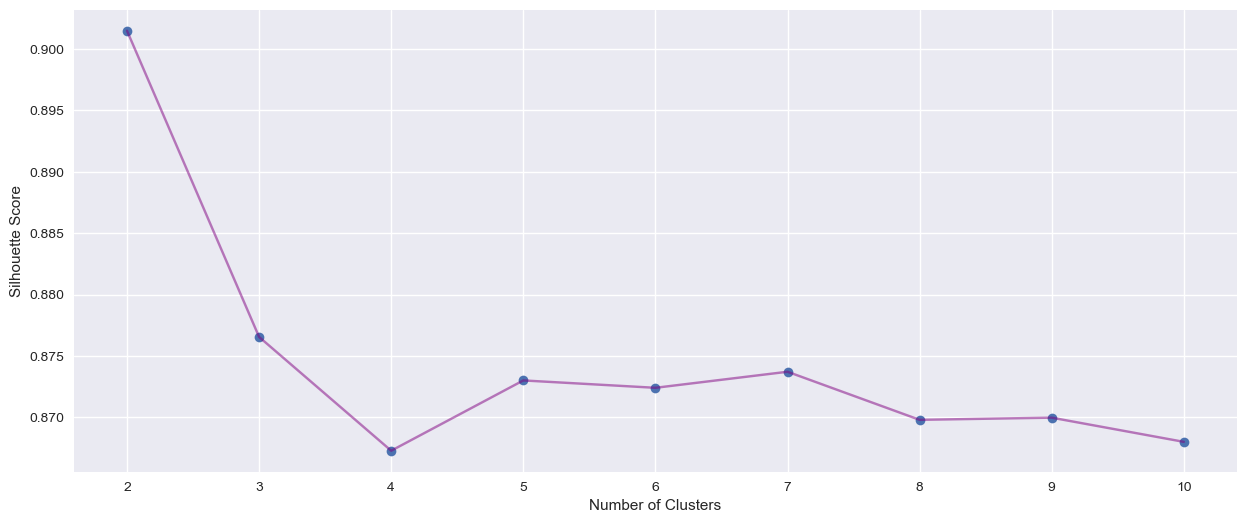

In [68]:
## Plot the number of clusters vs the silhouette score for the dataset.
##from https://statisticallyrelevant.com/k-means-clustering-in-python/
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

- En el cas d'aplicar la Siluette, veiem que el nombre de claster optim diu que és 2
- També veiem que el segon millor és el k=3
- Si mirem elsdiferents scores, a baix, veiem que totes les dades són molt bones igualment

In [70]:
ss_all

[0.9014972013497101,
 0.876543094421471,
 0.8672721877803418,
 0.8730001321787768,
 0.8723993251825998,
 0.8737071418108961,
 0.8697891806375628,
 0.8699659164205955,
 0.8679953725950503]

- També plotejo el grafic de Silouette dels kniffs per veure com es veuen els clusters

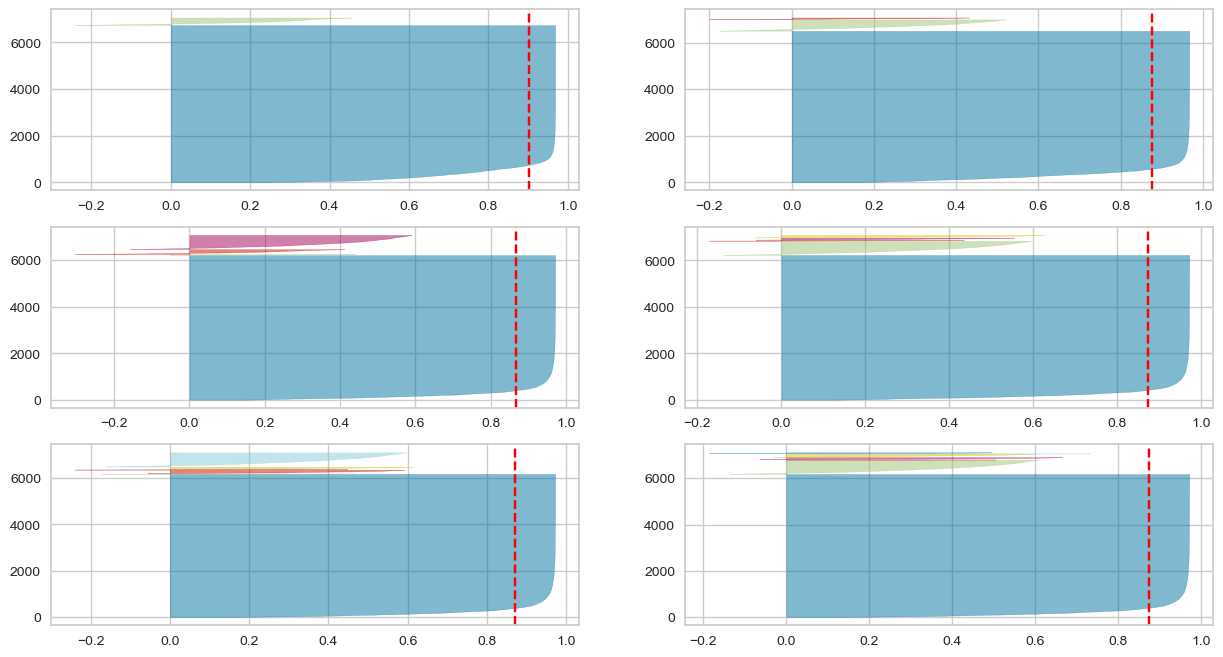

In [72]:
## Silhouette analysis
##From https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_pca)

### How to Analyze the Results of PCA and K-Means Clustering

- Before all else, we’ll create a new data frame. It allows us to add in the values of the separate components to our segmentation data set. 
- The components’ scores are stored in the ‘X_pca’ variable. 
- Let’s label them Component 1, 2 . In addition, we also append the ‘K means P C A’ labels to the new data frame.

In [73]:
X_pca
## The kmeans resulting labels and cluster centers
kmeans_pca_labels = kmeans_pca.labels_
cluster_centers = kmeans_pca.cluster_centers_

array([[ 49.11434357,  37.9983372 ],
       [-14.51701767,  -2.00486568],
       [  3.56280342,   3.35670059],
       ...,
       [-14.47857522,  -1.96171968],
       [-10.61216481,   1.67014506],
       [-14.54606357,  -2.05049537]])

In [81]:
## We concatenate to X the x_pca 2 components (1st converting them to a dataframe)
X_pca_kmeans = pd.concat([X.reset_index(drop= True), pd.DataFrame(X_pca)], axis=1)
X_pca_kmeans.columns.values[-2:] = ['Component_1', 'Component_2']

## Last column we add contains the pca k-means clustering labels
X_pca_kmeans['Cluster_k-Means_PCA'] = kmeans_pca.labels_

In [82]:
X_pca_kmeans

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  ...  status  video  month_sin  \
0           1.0       1.0         0.0     0  ...       0      1   0.866025   
1           0.0       0.0         0.0     0  ...       0      0   0.866025   
2           1.0       0.0         0.0     0  ...       0      1   0.866025   
3           0.0       0.0         0.0     0  ...       0      0   0.866025   
4           0.0       0.0         0.0     0  ...       0      0   0.866025   
...         ...       ...         ...   ...  ...     ...    ...        ...   
7045        0.0       0.0         0.0     0  ...       0      0  -1.000000   
7046        1.0       0.0         0.0     0  ...       0      0  -1.000000   
7047        0.0       0.0         0.0     0  ...       0      0  -1.000000   
7048        0.0       0.0         0.0     0  ...       0      0  -1.000000   
7049        0.0       0.0         0.0     0  ...       0      0  -1.000000   

         month_cos   day_sin   day_cos  year  Component_1  Component_2  \
0    -5.000000e-01 -0.968077 -0.250653     6    49.114344    37.998337   
1    -5.000000e-01 -0.897805 -0.440394     6   -14.517018    -2.004866   
2    -5.000000e-01 -0.897805 -0.440394     6     3.562803     3.356701   
3    -5.000000e-01 -0.897805 -0.440394     6   -14.521116    -2.011199   
4    -5.000000e-01 -0.485302 -0.874347     6   -13.885132    -1.177348   
...            ...       ...       ...   ...          ...          ...   
7045 -1.836970e-16 -0.988468  0.151428     4   -14.538983    -2.038524   
7046 -1.836970e-16 -0.998717 -0.050649     4   -14.443015    -1.932720   
7047 -1.836970e-16 -0.897805 -0.440394     4   -14.478575    -1.961720   
7048 -1.836970e-16 -0.790776 -0.612106     4   -10.612165     1.670145   
7049 -1.836970e-16  0.897805 -0.440394     4   -14.546064    -2.050495   

      Cluster_k-Means_PCA  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
7045                    0  
7046                    0  
7047                    0  
7048                    0  
7049                    0  

[7050 rows x 21 columns]

In [84]:
## Checking that we still have 3 clusters
X_pca_kmeans['Cluster_k-Means_PCA'].nunique()

3

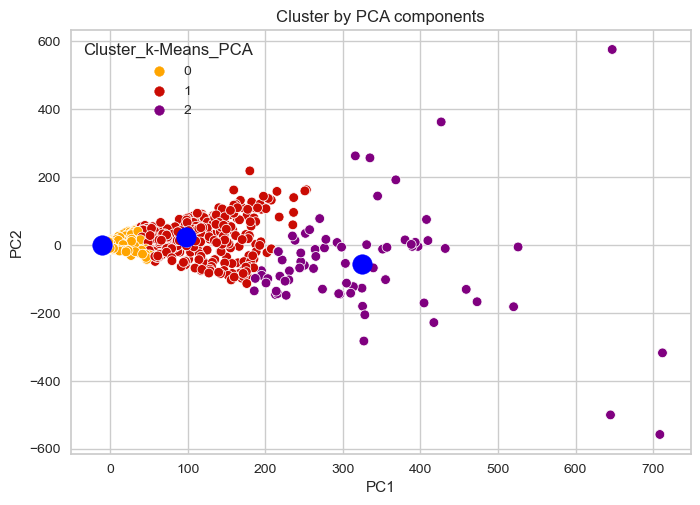

In [96]:
# Plotting the data points colored by the cluster labels
sns.scatterplot(data=X_pca_kmeans, x="Component_1", y="Component_2", hue="Cluster_k-Means_PCA", palette=['orange', 'r', 'purple'])

# Superimpose the cluster centers as points
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='o', c="blue", alpha=1, s=200)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title('Cluster by PCA components')
plt.show()

In [126]:
clusters = X_pca_kmeans.groupby('Cluster_k-Means_PCA').mean()
clusters

num_reactions  num_comments  num_shares  num_likes  \
Cluster_k-Means_PCA                                                       
0                         0.724786      2.025659    2.658160   0.848040   
1                         2.112401     69.103250   84.286232   1.842804   
2                         3.151815    291.810990  174.510417   2.804603   

                     num_loves   num_wows  num_hahas  num_sads  num_angrys  \
Cluster_k-Means_PCA                                                          
0                     1.505209   0.629407   0.291147  0.153041    0.056043   
1                    34.557626   8.728778   4.917184  1.041408    0.714286   
2                    47.842593  10.916667   8.944444  3.069444    1.236111   

                       link  ...     video  month_sin  month_cos   day_sin  \
Cluster_k-Means_PCA          ...                                             
0                    0.0097  ...  0.274365   0.058929   0.042016 -0.010990   
1                    0.0000  ...  0.995859   0.194300   0.097749 -0.012984   
2                    0.0000  ...  0.986111  -0.084197  -0.195673  0.089585   

                      day_cos         year  Component_1  Component_2  \
Cluster_k-Means_PCA                                                    
0                   -0.019970  2016.280370   -10.862636    -1.076214   
1                   -0.016997  2017.590062    97.608499    22.632134   
2                    0.004144  2017.458333   325.109981   -54.740399   

                        month        day  
Cluster_k-Means_PCA                       
0                    6.579369  15.809084  
1                    6.480331  15.693582  
2                    7.083333  14.972222  

[3 rows x 22 columns]

In [99]:
##We decoded the year and readed the month and day to check if there is cyclicity in the clusters
X_pca_kmeans['year'] = df.date_time.dt.year
X_pca_kmeans['month'] = df.date_time.dt.month
X_pca_kmeans['day'] = df.date_time.dt.day
X_pca_kmeans

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  ...  month_sin     month_cos  \
0           1.0       1.0         0.0     0  ...   0.866025 -5.000000e-01   
1           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
2           1.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
3           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
4           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
...         ...       ...         ...   ...  ...        ...           ...   
7045        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7046        1.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7047        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7048        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7049        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   

       day_sin   day_cos  year  Component_1  Component_2  Cluster_k-Means_PCA  \
0    -0.968077 -0.250653  2018    49.114344    37.998337                    1   
1    -0.897805 -0.440394  2018   -14.517018    -2.004866                    0   
2    -0.897805 -0.440394  2018     3.562803     3.356701                    0   
3    -0.897805 -0.440394  2018   -14.521116    -2.011199                    0   
4    -0.485302 -0.874347  2018   -13.885132    -1.177348                    0   
...        ...       ...   ...          ...          ...                  ...   
7045 -0.988468  0.151428  2016   -14.538983    -2.038524                    0   
7046 -0.998717 -0.050649  2016   -14.443015    -1.932720                    0   
7047 -0.897805 -0.440394  2016   -14.478575    -1.961720                    0   
7048 -0.790776 -0.612106  2016   -10.612165     1.670145                    0   
7049  0.897805 -0.440394  2016   -14.546064    -2.050495                    0   

      month  day  
0         4   22  
1         4   21  
2         4   21  
3         4   21  
4         4   18  
...     ...  ...  
7045      9   24  
7046      9   23  
7047      9   21  
7048      9   20  
7049      9   10  

[7050 rows x 23 columns]

In [120]:
X_pca_kmeans.groupby(['Cluster_k-Means_PCA'], sort=True).mean().round(3)

num_reactions  num_comments  num_shares  num_likes  \
Cluster_k-Means_PCA                                                       
0                            0.725         2.026       2.658      0.848   
1                            2.112        69.103      84.286      1.843   
2                            3.152       291.811     174.510      2.805   

                     num_loves  num_wows  num_hahas  num_sads  num_angrys  \
Cluster_k-Means_PCA                                                         
0                        1.505     0.629      0.291     0.153       0.056   
1                       34.558     8.729      4.917     1.041       0.714   
2                       47.843    10.917      8.944     3.069       1.236   

                     link  ...  video  month_sin  month_cos  day_sin  day_cos  \
Cluster_k-Means_PCA        ...                                                  
0                    0.01  ...  0.274      0.059      0.042   -0.011   -0.020   
1                    0.00  ...  0.996      0.194      0.098   -0.013   -0.017   
2                    0.00  ...  0.986     -0.084     -0.196    0.090    0.004   

                         year  Component_1  Component_2  month     day  
Cluster_k-Means_PCA                                                     
0                    2016.280      -10.863       -1.076  6.579  15.809  
1                    2017.590       97.608       22.632  6.480  15.694  
2                    2017.458      325.110      -54.740  7.083  14.972  

[3 rows x 22 columns]

### Plottejo unes quantes gràfiques per entendre els resultats

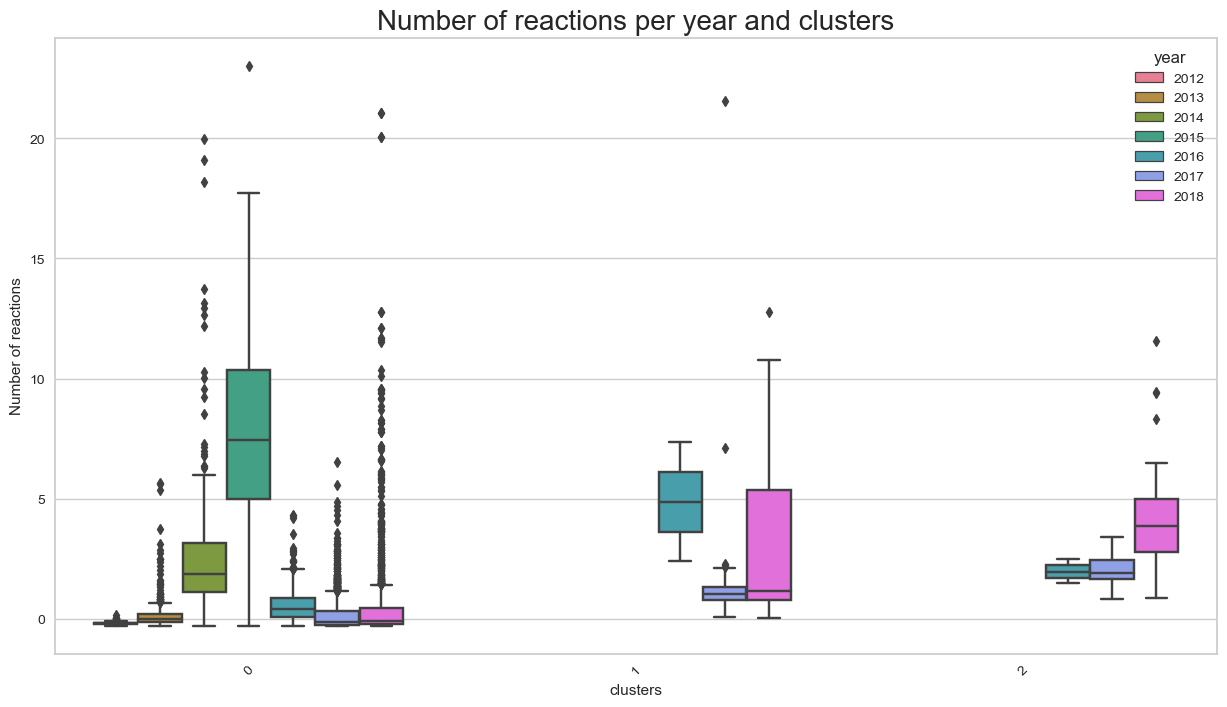

In [102]:
plt.figure(figsize=(15,8))
g = sns.boxplot(data = X_pca_kmeans, x = 'Cluster_k-Means_PCA', y='num_reactions', hue = 'year', palette='husl')
g.set_title('Number of reactions per year and clusters', fontsize=20)
plt.xlabel('clusters')
plt.ylabel('Number of reactions')
plt.xticks(rotation = 45);

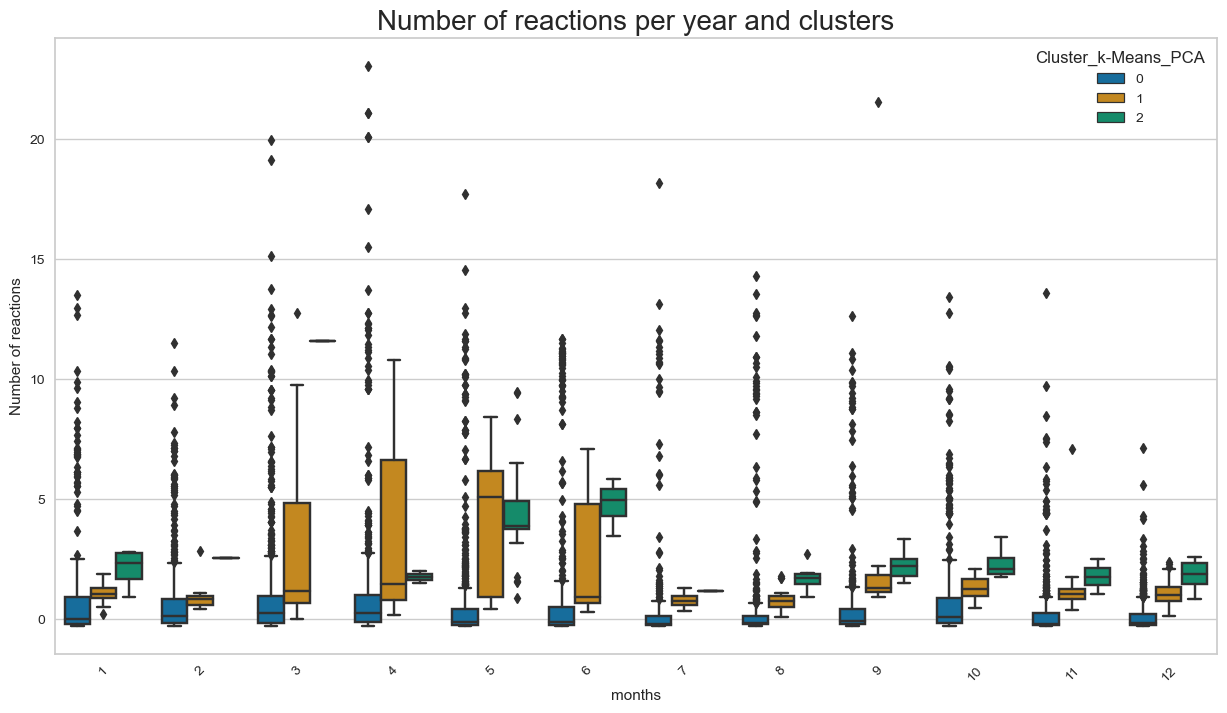

In [104]:

plt.figure(figsize=(15,8))
g = sns.boxplot(data = X_pca_kmeans, x = 'month', y='num_reactions', hue = 'Cluster_k-Means_PCA', palette='colorblind')
g.set_title('Number of reactions per year and clusters', fontsize=20)
plt.xlabel('months')
plt.ylabel('Number of reactions')
plt.xticks(rotation = 45);

In [105]:
X_pca_kmeans.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'link', 'photo',
       'status', 'video', 'month_sin', 'month_cos', 'day_sin', 'day_cos',
       'year', 'Component_1', 'Component_2', 'Cluster_k-Means_PCA', 'month',
       'day'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

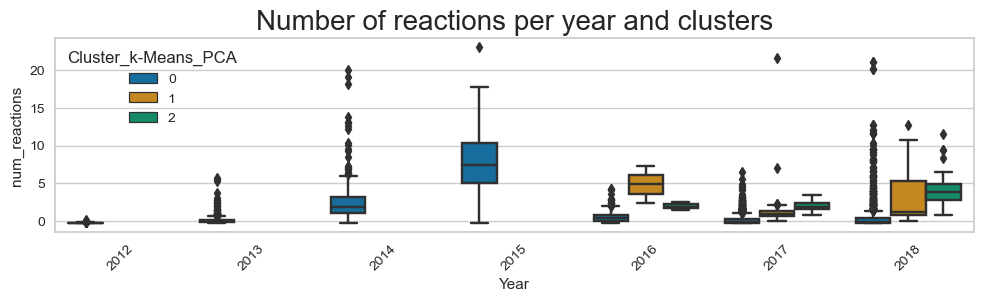

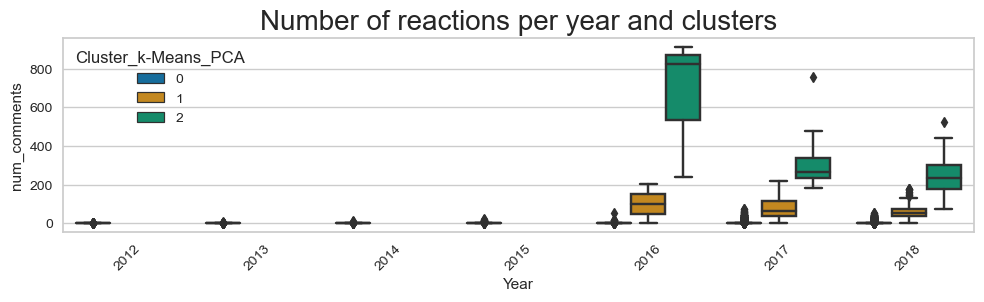

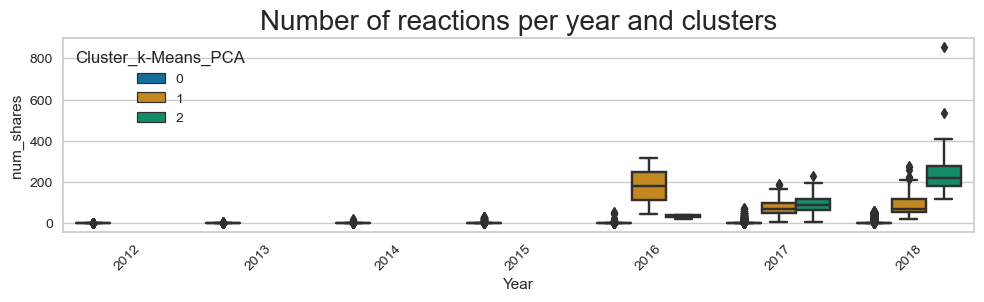

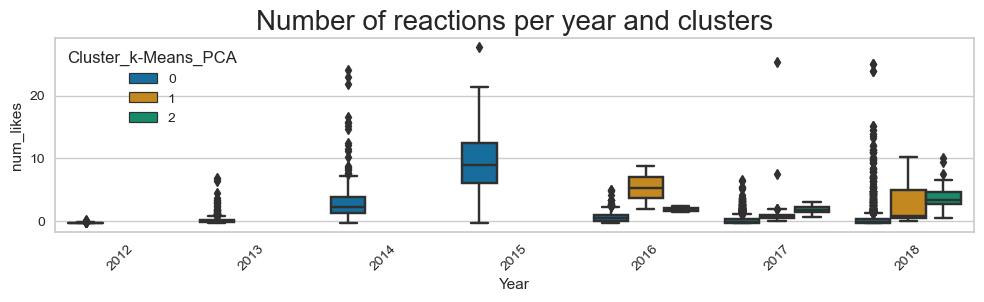

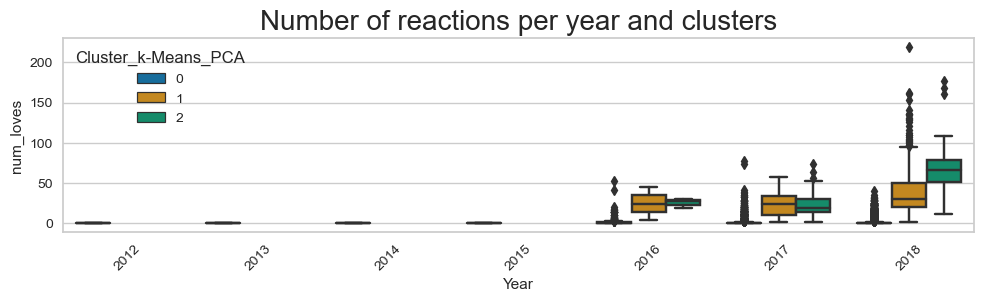

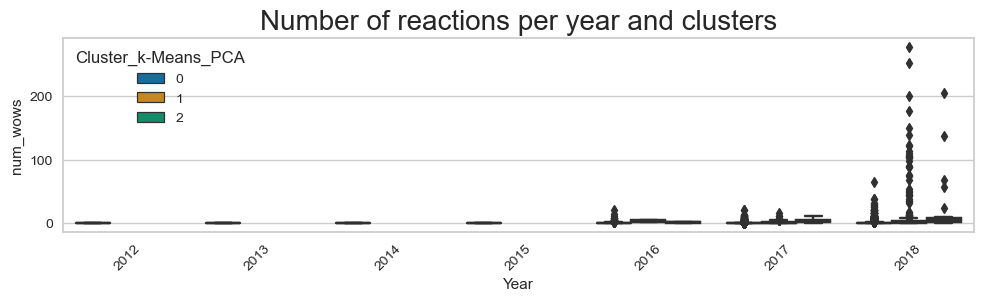

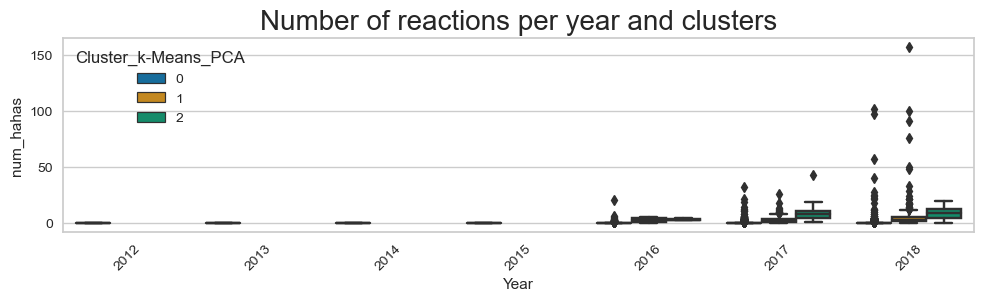

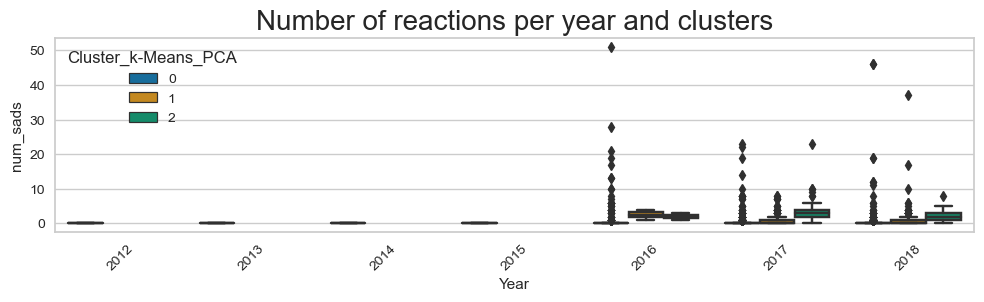

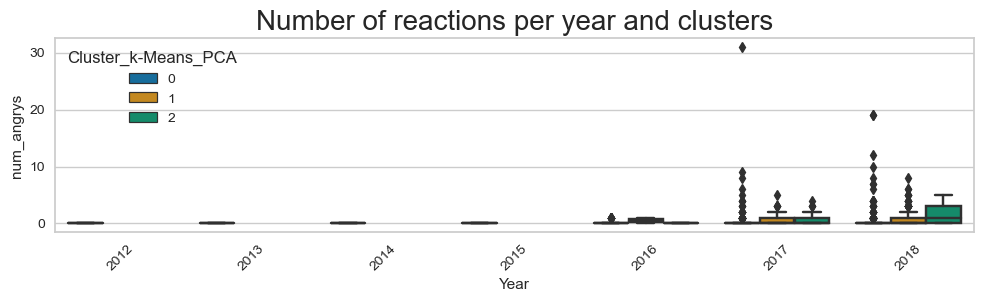

In [113]:
df_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

for column in df_columns:
    plt.figure(figsize=(10,3))
    g = sns.boxplot(data = X_pca_kmeans, x = 'year', y = column, hue = 'Cluster_k-Means_PCA', palette='colorblind')
    g.set_title('Number of reactions per year and clusters', fontsize=20)
    plt.tight_layout()
    plt.xlabel('Year')
    #plt.xlabel('months')
    plt.ylabel(column)
    plt.xticks(rotation = 45);

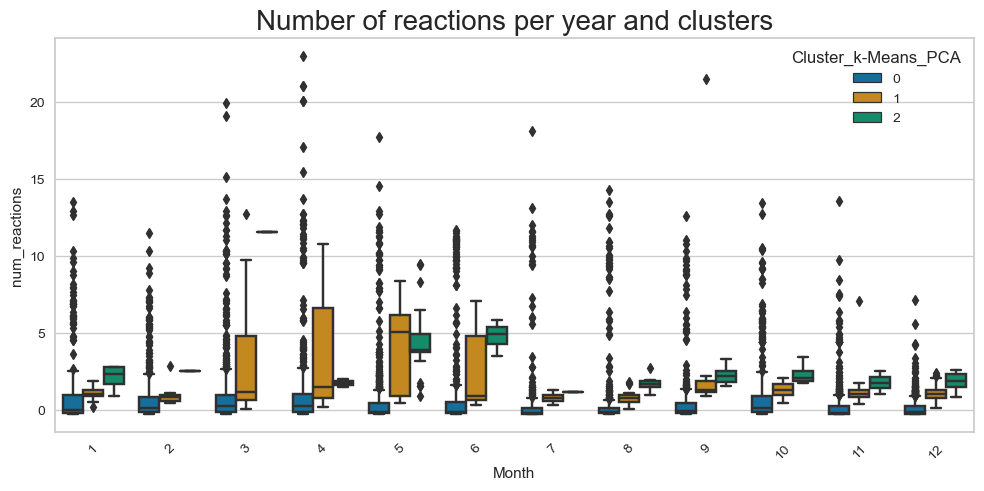

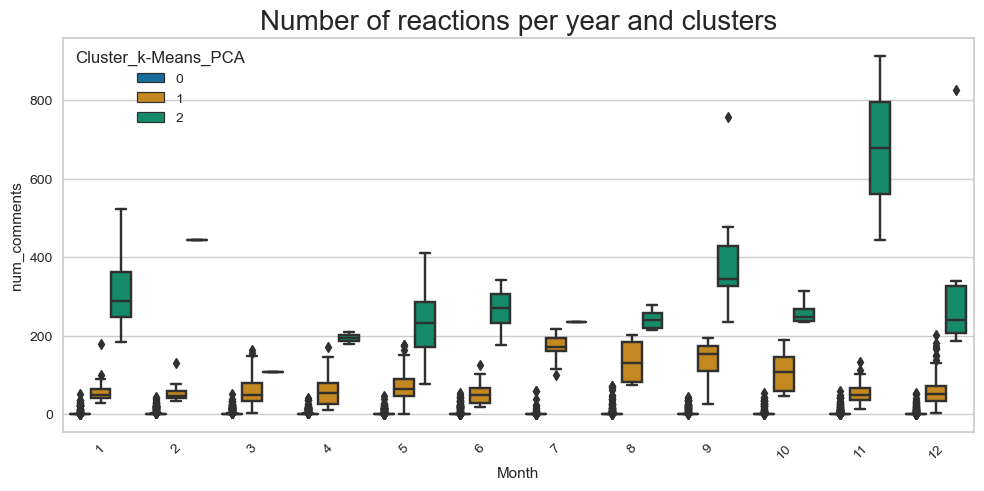

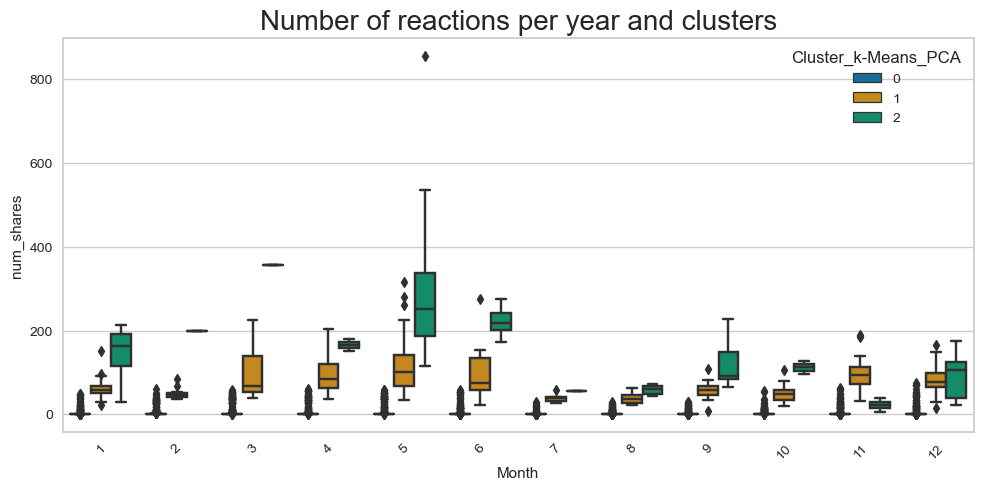

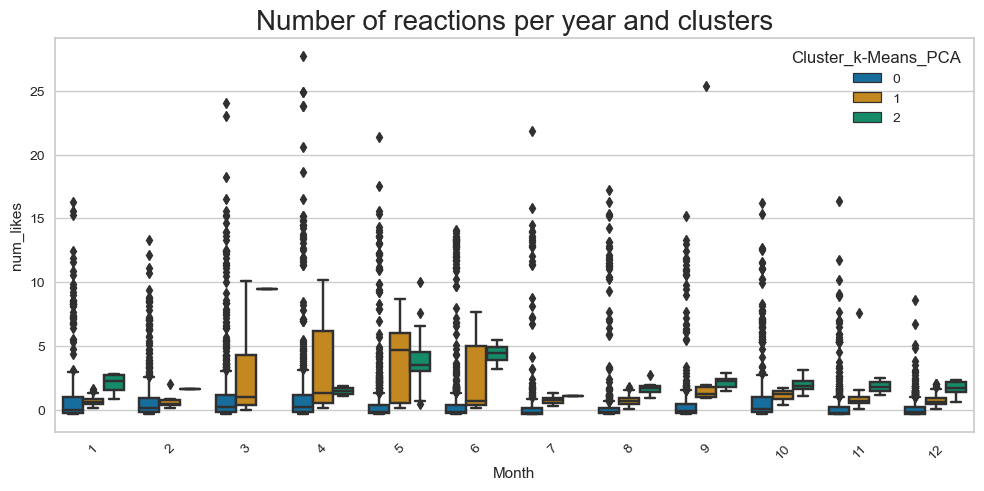

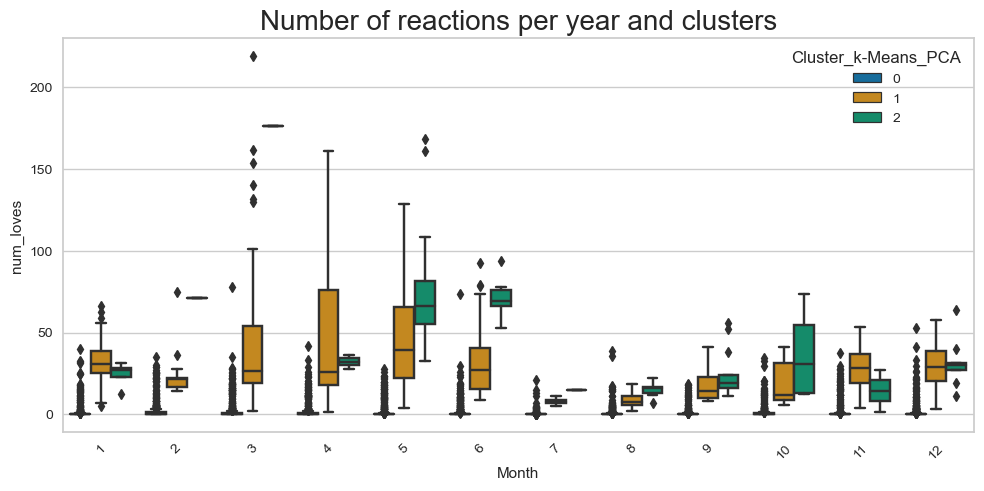

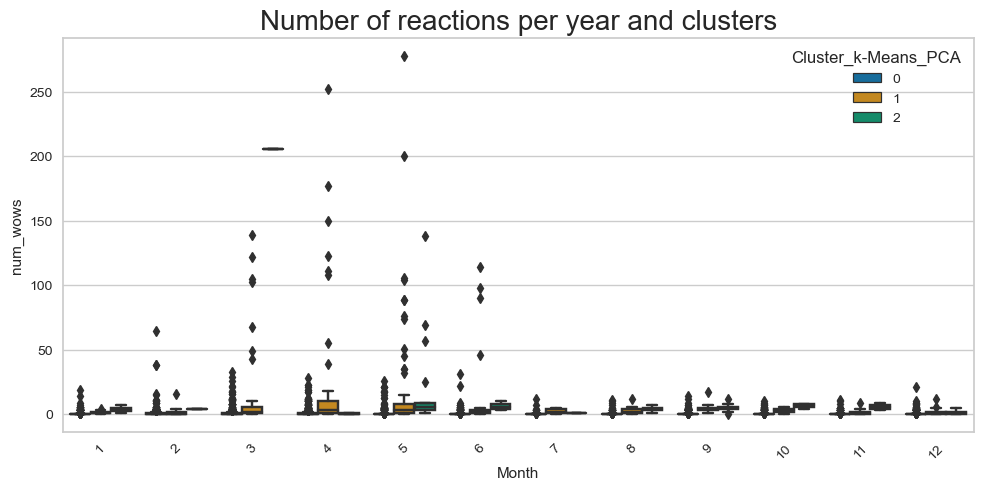

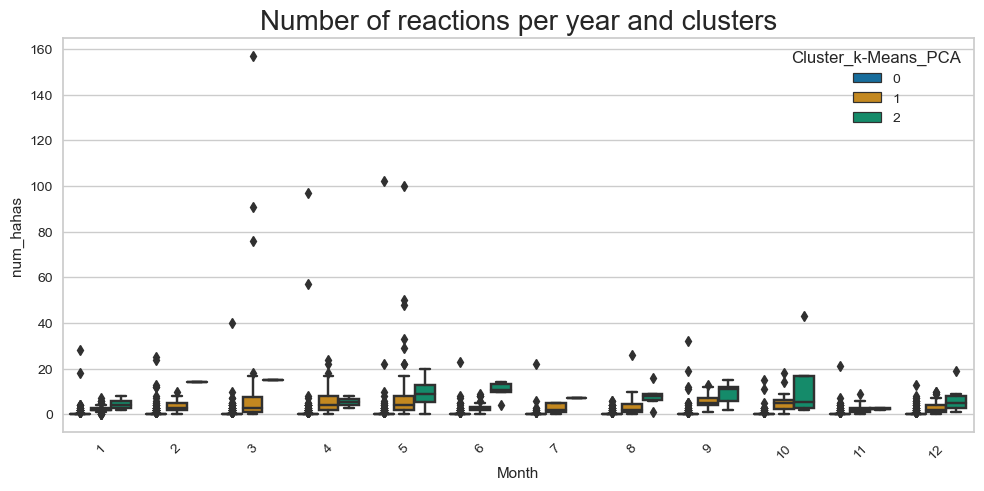

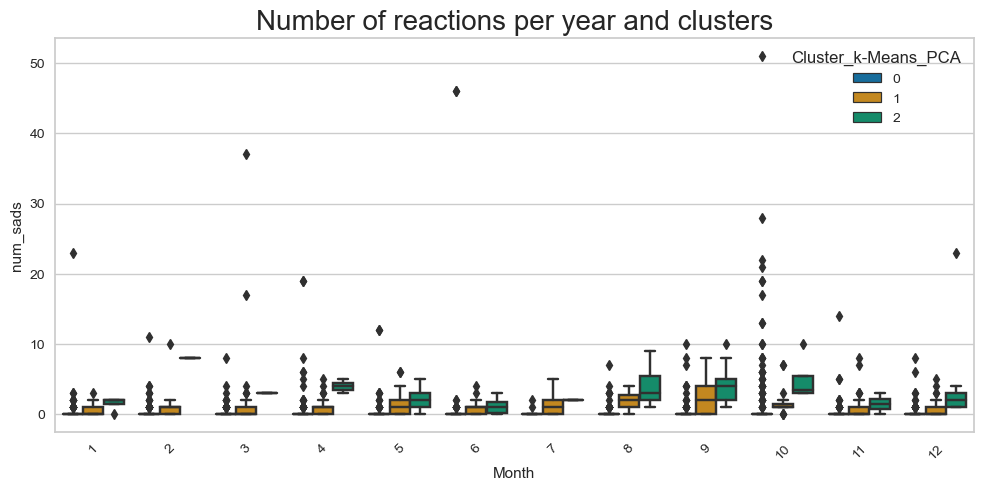

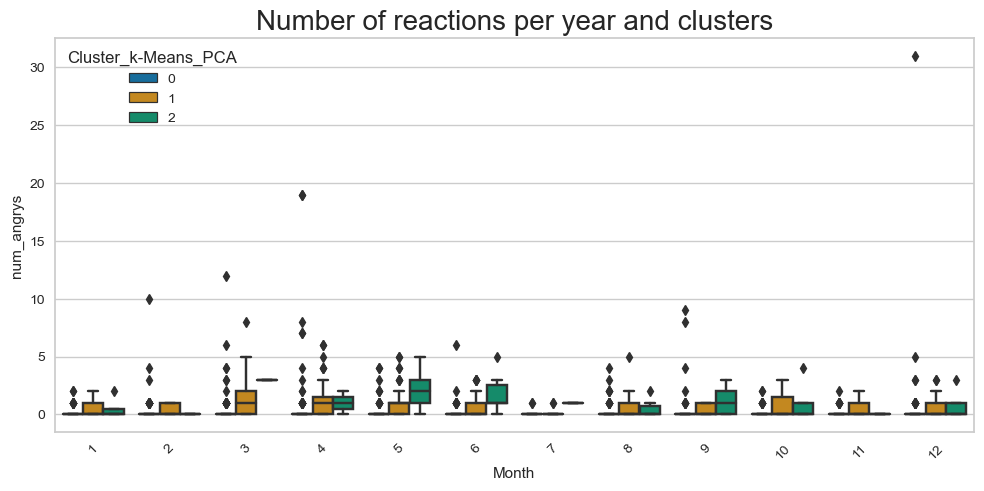

In [115]:
df_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

for column in df_columns:
    plt.figure(figsize=(10,5))
    g = sns.boxplot(data = X_pca_kmeans, x = 'month', y = column, hue = 'Cluster_k-Means_PCA', palette='colorblind')
    g.set_title('Number of reactions per year and clusters', fontsize=20)
    plt.tight_layout()
    plt.xlabel('Month')
    #plt.xlabel('months')
    plt.ylabel(column)
    plt.xticks(rotation = 45);

In [175]:
X_pca_kmeans.groupby(['Cluster_k-Means_PCA'], sort=True).mean().round(3)

num_reactions  num_comments  num_shares  num_likes  \
Cluster_k-Means_PCA                                                       
0                            0.725         2.026       2.658      0.848   
1                            2.112        69.103      84.286      1.843   
2                            3.152       291.811     174.510      2.805   

                     num_loves  num_wows  num_hahas  num_sads  num_angrys  \
Cluster_k-Means_PCA                                                         
0                        1.505     0.629      0.291     0.153       0.056   
1                       34.558     8.729      4.917     1.041       0.714   
2                       47.843    10.917      8.944     3.069       1.236   

                     link  ...  video  month_sin  month_cos  day_sin  day_cos  \
Cluster_k-Means_PCA        ...                                                  
0                    0.01  ...  0.274      0.059      0.042   -0.011   -0.020   
1                    0.00  ...  0.996      0.194      0.098   -0.013   -0.017   
2                    0.00  ...  0.986     -0.084     -0.196    0.090    0.004   

                         year  Component_1  Component_2  month     day  
Cluster_k-Means_PCA                                                     
0                    2016.280      -10.863       -1.076  6.579  15.809  
1                    2017.590       97.608       22.632  6.480  15.694  
2                    2017.458      325.110      -54.740  7.083  14.972  

[3 rows x 22 columns]

#### Analisis de les gràfiques anterirors:

- Aquestes gràfiques ens permeten comença a veure que hi ha dins de cada cluster, tot i així, tenim taaantes variables que es fa molt dificil

- a les gràfiques respecte els anys, veiem clarament quan es van introduir les diferent tipus de reaccions, a partir del 2016, i que el grup 0 engloba principalment tots aqueslles reaccions dels primers anys
- Per exemple, podriem veure que el grup 1 dona més shares, likes i loves en els mesos de primavera i menys a la resta marcant una clara sisonalitat potser es relaciona que a Tahilandia t'estas morint de calor a lestiu, o que és la temporada turistica a  i la majoria de gent va molt atrafegada! qui sap!?

- Probablament hauriem de buscar una manera de reduir el data set, suposo que focalitzant millor en una pregunta especifica a respondre ens ajudaria a processar el data set de tal manera que es reduicin el nombre de variables. En aquesta ocasió, no he arribat a més.. 🙃 de fet, ja sabem que m'he passat de temps! 🤣

#### Parallel Coordinates plot

- Aquest és un plot que ens podria ajudar a entendre la distribució de les variables en cada  cluster. Tot i així com que hi ha moltes variables i moltes samples s'hauria de fer amb els cluster centers per tal de veure quin valor tenen mitja cada cluster a cada variable

- He utilitzat la llibreria plotly perque em fa el grafic interactiu. Es poden seleccionar trams dels eixos i resalta les variables del tram nomès, o canviar els eixos verticals de lloc!! un plot a explorar segur!!

In [122]:
## parallel Coordinates plot from: https://www.analyticsvidhya.com/blog/2021/11/visualize-data-using-parallel-coordinates-plot/

#df_ = df.copy()
# color     : Values from this column are used to assign color to the poly lines.
# dimensions: Values from these columns form the axes in the plot.
df_columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

fig = px.parallel_coordinates(X_pca_kmeans, color = 'Cluster_k-Means_PCA', 
                              dimensions= df_columns,
                              #color_continuous_scale=px.colors.sequential.Viridis,
                              #color_continuous_scale=px.colors.diverging.Portland,
                              color_continuous_scale=[(0.00, "orange"), (0.33, "orange"), (0.33, "purple"), (0.66, "purple"), (0.66, "red"),  (1.00, "red")],
                              color_continuous_midpoint=1)




fig.show()

In [133]:
X_pca

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  ...  month_sin     month_cos  \
0           1.0       1.0         0.0     0  ...   0.866025 -5.000000e-01   
1           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
2           1.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
3           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
4           0.0       0.0         0.0     0  ...   0.866025 -5.000000e-01   
...         ...       ...         ...   ...  ...        ...           ...   
7045        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7046        1.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7047        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7048        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   
7049        0.0       0.0         0.0     0  ...  -1.000000 -1.836970e-16   

       day_sin   day_cos  year  Component_1  Component_2  Cluster_k-Means_PCA  \
0    -0.968077 -0.250653  2018    49.114344    37.998337                    1   
1    -0.897805 -0.440394  2018   -14.517018    -2.004866                    0   
2    -0.897805 -0.440394  2018     3.562803     3.356701                    0   
3    -0.897805 -0.440394  2018   -14.521116    -2.011199                    0   
4    -0.485302 -0.874347  2018   -13.885132    -1.177348                    0   
...        ...       ...   ...          ...          ...                  ...   
7045 -0.988468  0.151428  2016   -14.538983    -2.038524                    0   
7046 -0.998717 -0.050649  2016   -14.443015    -1.932720                    0   
7047 -0.897805 -0.440394  2016   -14.478575    -1.961720                    0   
7048 -0.790776 -0.612106  2016   -10.612165     1.670145                    0   
7049  0.897805 -0.440394  2016   -14.546064    -2.050495                    0   

      month  day  
0         4   22  
1         4   21  
2         4   21  
3         4   21  
4         4   18  
...     ...  ...  
7045      9   24  
7046      9   23  
7047      9   21  
7048      9   20  
7049      9   10  

[7050 rows x 23 columns]

### Exercici 2

<div class="alert alert-block alert-info">Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic. 
</div>

<div class="alert alert-success h2" role="alert">
    <b>the Hierarchical Alglomeration Clustering!!! :)</b>
</div>


- Per tal de fer el Hierarchical clustering primer plotteje un dendograma per veure uants clusters aplicarem

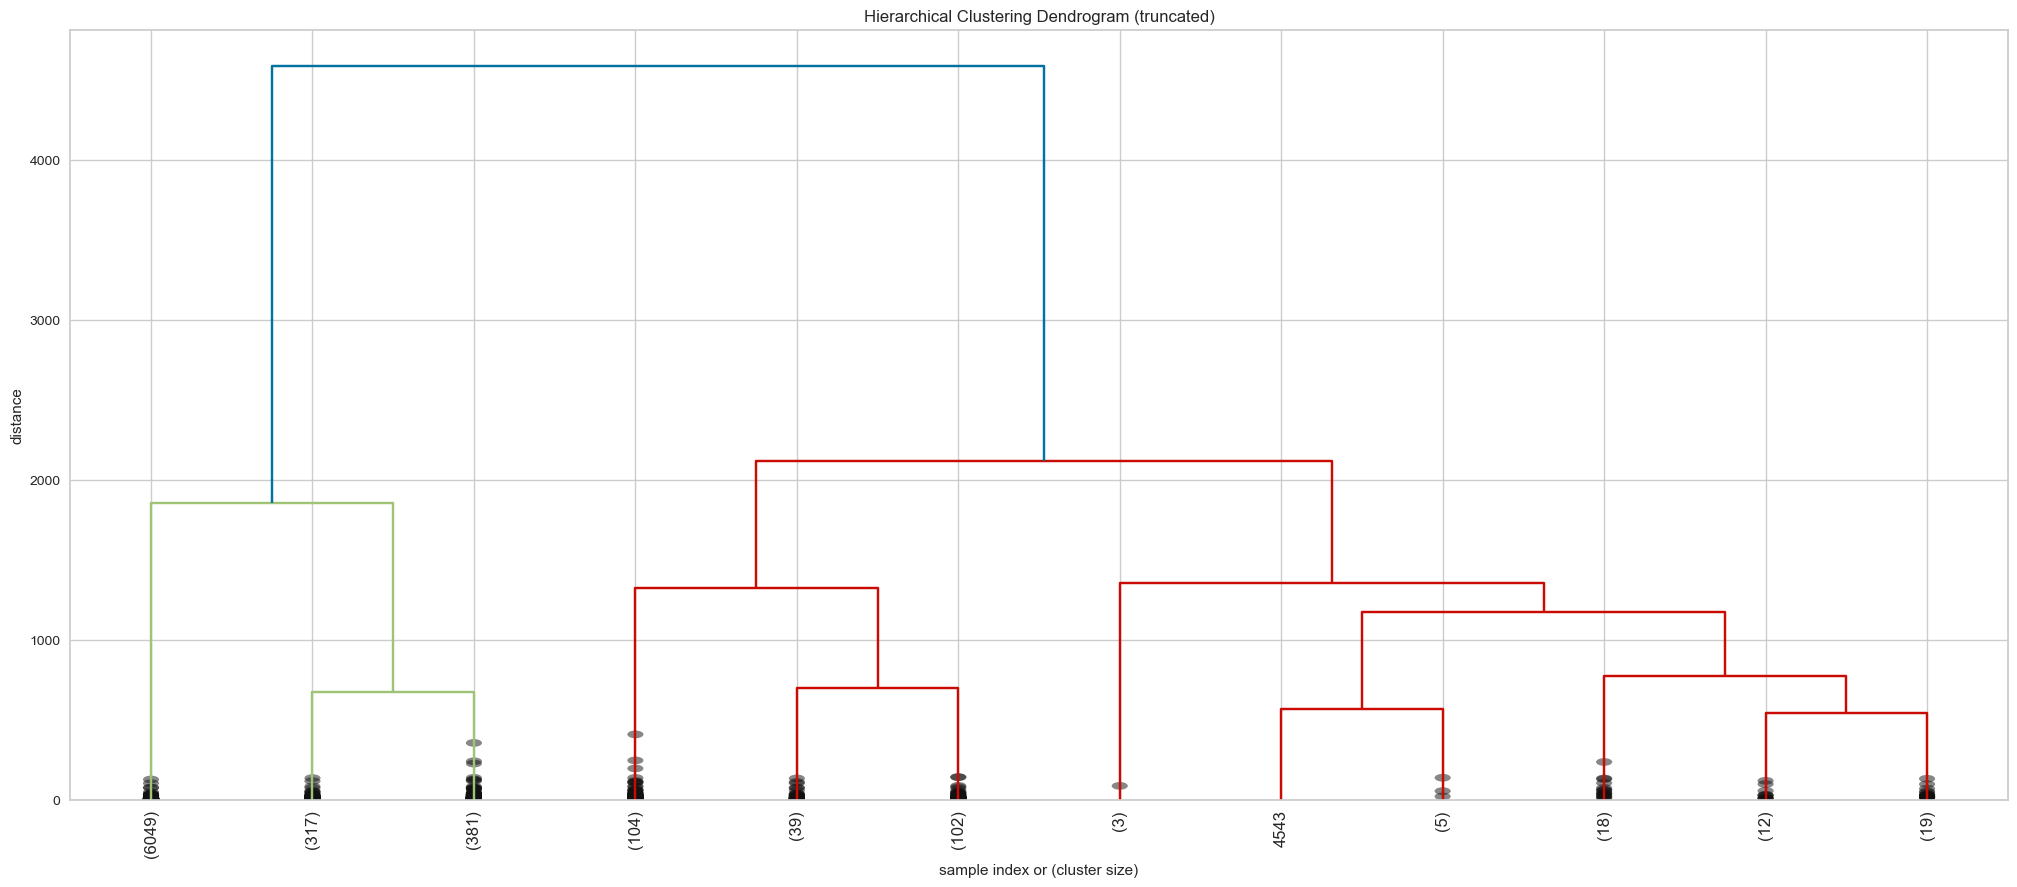

In [149]:
##Dendograma plot
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram = sch.dendrogram(
    sch.linkage(X_pca, method='ward'),
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)


- Clarament veiem que aqui ens diu que la distancia més curta és per 2 clusters

In [150]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_pca)
labels = model.labels_

In [151]:
#labels.min()
X_pca

array([[ 49.11434357,  37.9983372 ],
       [-14.51701767,  -2.00486568],
       [  3.56280342,   3.35670059],
       ...,
       [-14.47857522,  -1.96171968],
       [-10.61216481,   1.67014506],
       [-14.54606357,  -2.05049537]])

In [164]:
X_Hieri = X.copy()
X_Hieri = pd.concat([X_Hieri.reset_index(drop= True), pd.DataFrame(labels)], axis=1)
# df_pca_kmeans.columns.values[-2:] = ['Component_1', 'Component_2']
#X_Hieri.drop(axis=1)
X_Hieri['labels'] = labels
X_Hieri

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  photo  status  video  month_sin  \
0           1.0       1.0         0.0     0      0       0      1   0.866025   
1           0.0       0.0         0.0     0      1       0      0   0.866025   
2           1.0       0.0         0.0     0      0       0      1   0.866025   
3           0.0       0.0         0.0     0      1       0      0   0.866025   
4           0.0       0.0         0.0     0      1       0      0   0.866025   
...         ...       ...         ...   ...    ...     ...    ...        ...   
7045        0.0       0.0         0.0     0      1       0      0  -1.000000   
7046        1.0       0.0         0.0     0      1       0      0  -1.000000   
7047        0.0       0.0         0.0     0      1       0      0  -1.000000   
7048        0.0       0.0         0.0     0      1       0      0  -1.000000   
7049        0.0       0.0         0.0     0      1       0      0  -1.000000   

         month_cos   day_sin   day_cos  year  0  labels  
0    -5.000000e-01 -0.968077 -0.250653     6  1       1  
1    -5.000000e-01 -0.897805 -0.440394     6  1       1  
2    -5.000000e-01 -0.897805 -0.440394     6  1       1  
3    -5.000000e-01 -0.897805 -0.440394     6  1       1  
4    -5.000000e-01 -0.485302 -0.874347     6  1       1  
...            ...       ...       ...   ... ..     ...  
7045 -1.836970e-16 -0.988468  0.151428     4  1       1  
7046 -1.836970e-16 -0.998717 -0.050649     4  1       1  
7047 -1.836970e-16 -0.897805 -0.440394     4  1       1  
7048 -1.836970e-16 -0.790776 -0.612106     4  1       1  
7049 -1.836970e-16  0.897805 -0.440394     4  1       1  

[7050 rows x 20 columns]

In [165]:
##We decoded the year and readed the month and day to check if there is cyclicity in the clusters
X_Hieri['year'] = df.date_time.dt.year
X_Hieri['month'] = df.date_time.dt.month
X_Hieri['day'] = df.date_time.dt.day
X_Hieri

num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          2.324257     22.086957       65.50   2.229508  30.666667       3.0   
1          0.448020     -0.173913        0.00   0.548435   0.000000       0.0   
2          0.829208     10.086957       14.25   0.870343   7.000000       1.0   
3          0.254950     -0.173913        0.00   0.315946   0.000000       0.0   
4          0.759901     -0.173913        0.00   0.870343   3.000000       0.0   
...             ...           ...         ...        ...        ...       ...   
7045       0.146040     -0.173913        0.00   0.184799   0.000000       0.0   
7046      -0.215347     -0.173913        0.00  -0.262295   0.333333       0.0   
7047      -0.284653     -0.173913        0.00  -0.339791   0.333333       0.0   
7048       1.443069      0.347826        5.50   1.734724   0.666667       0.0   
7049      -0.210396     -0.173913        0.00  -0.244411   0.000000       0.0   

      num_hahas  num_sads  num_angrys  link  ...  video  month_sin  \
0           1.0       1.0         0.0     0  ...      1   0.866025   
1           0.0       0.0         0.0     0  ...      0   0.866025   
2           1.0       0.0         0.0     0  ...      1   0.866025   
3           0.0       0.0         0.0     0  ...      0   0.866025   
4           0.0       0.0         0.0     0  ...      0   0.866025   
...         ...       ...         ...   ...  ...    ...        ...   
7045        0.0       0.0         0.0     0  ...      0  -1.000000   
7046        1.0       0.0         0.0     0  ...      0  -1.000000   
7047        0.0       0.0         0.0     0  ...      0  -1.000000   
7048        0.0       0.0         0.0     0  ...      0  -1.000000   
7049        0.0       0.0         0.0     0  ...      0  -1.000000   

         month_cos   day_sin   day_cos  year  0  labels  month  day  
0    -5.000000e-01 -0.968077 -0.250653  2018  1       1      4   22  
1    -5.000000e-01 -0.897805 -0.440394  2018  1       1      4   21  
2    -5.000000e-01 -0.897805 -0.440394  2018  1       1      4   21  
3    -5.000000e-01 -0.897805 -0.440394  2018  1       1      4   21  
4    -5.000000e-01 -0.485302 -0.874347  2018  1       1      4   18  
...            ...       ...       ...   ... ..     ...    ...  ...  
7045 -1.836970e-16 -0.988468  0.151428  2016  1       1      9   24  
7046 -1.836970e-16 -0.998717 -0.050649  2016  1       1      9   23  
7047 -1.836970e-16 -0.897805 -0.440394  2016  1       1      9   21  
7048 -1.836970e-16 -0.790776 -0.612106  2016  1       1      9   20  
7049 -1.836970e-16  0.897805 -0.440394  2016  1       1      9   10  

[7050 rows x 22 columns]


### Exercici 2

<div class="alert alert-block alert-info">Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette. 
</div>


- Anteriorment s'ha calculat ls Silhouette pel Kmeans, ara es farà per l'agglomerative clustering

In [166]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_pca)

# Calculate silhouette score
ss_all = []
for n in range(2, 11):
    ac = (AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward'))
    predict = ac.fit_predict(X_pca)
    score = silhouette_score(X = X_pca, labels = predict)
    ss_all.append(score)

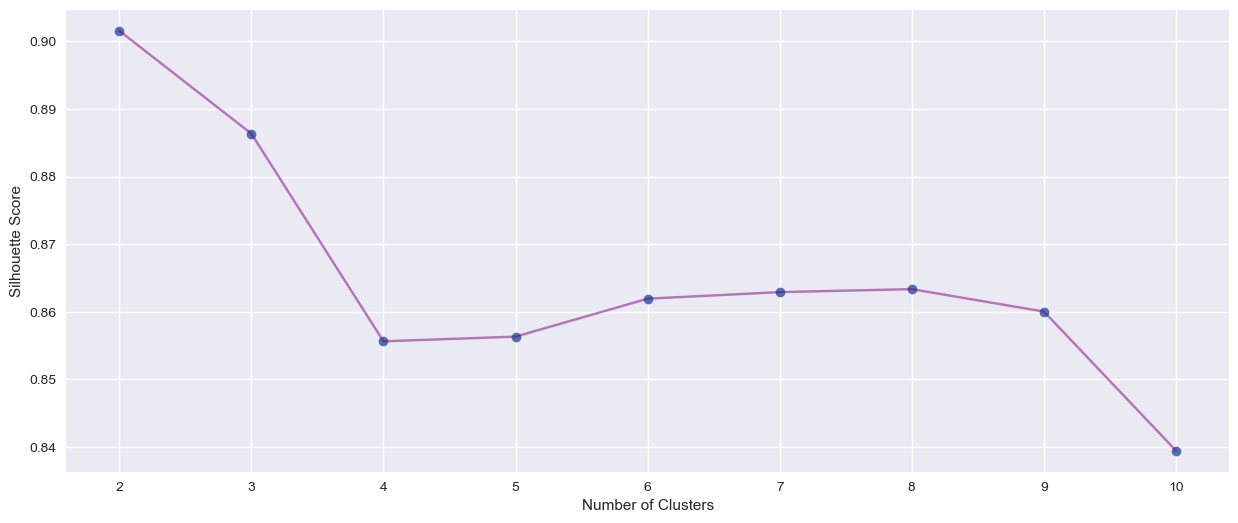

In [167]:
## Plot the number of clusters vs the silhouette score for the dataset.
##from https://statisticallyrelevant.com/k-means-clustering-in-python/
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , ss_all , 'o')
#plt.plot(np.arange(2 , 11) , ss_all , 'o', label = "Combined") ##plot with label
plt.plot(np.arange(2 , 11) , ss_all , '-' , alpha = 0.5, color = 'purple')
#plt.legend()
plt.xlabel('Number of Clusters') , plt.ylabel('Silhouette Score')
plt.show()

In [171]:
##Silhouette results for agglomerative clusttering
ss_all

[0.9015653956042828,
 0.8863481874671228,
 0.8556458260384475,
 0.8563372031011017,
 0.8619492669461091,
 0.8629186889837501,
 0.86335744028742,
 0.8600420032035381,
 0.8394697392907475]

In [174]:
### Copy of the Silhouette results copied here for kmeans
ss_all_kmeans =[0.9014972013497101,
 0.876543094421471,
 0.8672721877803418,
 0.8730001321787768,
 0.8723993251825998,
 0.8737071418108961,
 0.8697891806375628,
 0.8699659164205955,
 0.8679953725950503]



- En el cas de l'Agglomerative clustering sembla que dona un pèl millor que el kmeans amb 2 clusters, tot i així per la resta de numero de clusters clusters dona millor el Kmeans
